In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

import numpy as np
from scipy.linalg import triu

import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from pprint import pprint

import pyLDAvis.gensim
import pyLDAvis
pyLDAvis.enable_notebook()

import pickle

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpera

C:\Users\melis\anaconda3\lib\site-packages\gensim\matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu


<h1> Encapsulate Functionality </h1><br><sup><h3> Data Aggregation and Data Pre-Processing</h3></sup>


<ul>
    <li> <b> Variables URL and review_div_class </b> </li> 
</ul>
<ol>    
<li> Below I have stored the url of the website I am scraping into variable URL.</li>
<li> The inspected web page div class is stored as variable review_div_class.</li>
    <ul>
        <li><b>Class Get Reviews</b> </li> </ul>
    <li> The first method definition is defined inside the class GetReviews as a constructor.</li>
    <li> Here I have initialized self, base_url, review_div_class as parameters which can be called when the class is instantiated. </li>
    <li> The next method is defined as <b> scrape_reviews</b>.
    <li> Here I am creating a utility function which will be used by another function. </li>
    <li> The response variable is to store the <b>GET</b> http request from the <b>URL</b>(page_url).</li>
    <li> The soup variable is where the BeautifulSoup object is called to parse the data which will be stored from the response variable. Because I am scraping html, html.parser is passed as a parameter.</li>
    <li> The review_elements variable will contain the correct elements using find_all to search the parsed tree for the correct div as specified in self.review_div_class.</li>
    <li> The next variable reviews is initialized to store the extracted data using a for loop to iterate through each element and extracting only the text. Strip=True is to remove unecessary whitespace from the front and end of a sentence. This will help with minimize data preprocessing ensuring correct format.</li>
    <li> The next method is defined as <b>populate_dataframe</b> for the GetReviews class.</li>
    <li> An empty list is initiated as <b>extracted_data</b> where the preprocessed extracted data will be stored</li>
    <li> During manual inspection, I noticed that the reviews ended with a colon before the string 'Date of experience' was typed and then the date.</li>
    <li> Therefore this method uses a for loop to iterate over each review and splitting the text into two parts at the last colon then stored in variable review_text.</li>
    <li> The variable review_date is then written to store the second part of the split which contains the date and the string 'Date of experience'.</li> 
    <li> .rstrip is then implemented to remove the string 'Date of experience'</li>
    <li> A new dictionary is then created to store the value key pairs stored in the variables which then becomes the df columns. </li>
    <li> The final method is defined as get_df inside the GetReviews class.</li>
    <li> It has two parameters, self and pages which was set at 18 because there was 18 pages of reviews for the company on trustpilot</li>
    <li> An empty list is then stored in a new variable called all_reviews to store all reviews</li>
    <li> Another for loop is used to iterate over all the pages with a plus 1 as python starts counting at 0</li>
    <li> The print function shows the process by printing each page as it is being scraped</li>
    <li>  The final sections of the class method, formats the url for each page and extends this to a list, this list is then used to populate the dataframe</li>
    <li> The class GetReviews is then applied with the parameters url, review_div_class, which initiates the object as scraper which is then passed to the function get_df and stored into a df</li>
</ol>

In [3]:
#import re
#from nltk.corpus import stopwords

#url = "https://www.trustpilot.com/review/*****"
#review_div_class = 'styles_reviewContent__0Q2Tg'
#
#class GetReviews:
#    def __init__(self, base_url, review_div_class):
#        self.base_url = base_url 
#        self.review_div_class = review_div_class
#
#    def scrape_reviews(self, page_url):
#        response = requests.get(page_url)
#        soup = BeautifulSoup(response.content, 'html.parser')
#        review_elements = soup.find_all('div', class_=self.review_div_class)
#        reviews = [review.get_text(strip=True) for review in review_elements]
#        return reviews
#
#    def populate_dataframe(self, reviews):
#        extracted_data = []
#        for review in reviews:
#            parts = review.rsplit(':', 1)
#            review_text = parts[0].strip() if len(parts) > 0 else ""
#            review_date = parts[1].strip() if len(parts) > 1 else ""
#            review_text = review_text.rstrip('Date of experience')
#            
#            # Additional text processing
#            review_text = re.sub(r'([^a-zA-Z0-9_])([A-Z])', r'\1 \2', review_text)
#            review_text = re.sub(r'(^|[a-z0-9])([A-Z]+)', r'\1 \2', review_text)
#            stop_words = set(stopwords.words('english'))
#            review_text = re.sub(r"http\S+|www\S+|https\S+", '', review_text, flags=re.MULTILINE)
#            review_text = review_text.encode('ascii', 'ignore').decode('ascii')
#            review_text = re.sub(r'\***\b|\b***\b|\b****\b|\b****\b', '', review_text, flags=re.I)
#            review_text = ' '.join([word for word in review_text.split() if word not in stop_words])
#
#            extracted_data.append({'Review': review_text, 'Date Posted': review_date})
#
#        df = pd.DataFrame(extracted_data)
#        df['Date Posted'] = pd.to_datetime(df['Date Posted'])
#        return df
#
#    def get_df(self, pages=18):
#        all_reviews = []
#        for page in range(1, pages + 1):
#            print(f"Scraping page {page}")
#            page_url = f"{self.base_url}?page={page}"
#            page_reviews = self.scrape_reviews(page_url)
#            all_reviews.extend(page_reviews)
#            time.sleep(1)  # Add a 1-second delay after scraping each page
#        df = self.populate_dataframe(all_reviews)
#        return df


In [4]:
#scraper = GetReviews(url, review_div_class)
#df = scraper.get_df()

In [5]:
#df.to_csv('C:\\Users\\melis\\1MSC_CCT_23_24\\GitHubTransport\\TransportAssignment\\eir_bus.csv', index=False)

In [6]:
#url2 = "https://uk.trustpilot.com/review/uk.***.com"
#review_div_class2 = 'styles_reviewContent__0Q2Tg'
#
#import re
#from nltk.corpus import stopwords
#
#class GetReviews2:
#    def __init__(self, base_url, review_div_class, start_page, end_page):
#        self.base_url = base_url
#        self.review_div_class = review_div_class
#        self.start_page = start_page
#        self.end_page = end_page
#        self.session = requests.Session()
#
#    def scrape_reviews(self, page_url):
#        response = self.session.get(page_url)
#        soup = BeautifulSoup(response.content, 'html.parser')
#        review_elements = soup.find_all('div', class_=self.review_div_class)
#        reviews = [review.get_text(strip=True) for review in review_elements]
#        return reviews
#
#    def populate_dataframe(self, reviews):
#        extracted_data = []
#        for review in reviews:
#            parts = review.split("Date of experience:")
#            review_text = parts[0].strip() if len(parts) > 0 else ""
#            review_date = parts[1].strip() if len(parts) > 1 else ""
#
#            
#            # Additional text processing
#            review_text = re.sub(r'([^a-zA-Z0-9_])([A-Z])', r'\1 \2', review_text)
#            review_text = re.sub(r'(^|[a-z0-9])([A-Z]+)', r'\1 \2', review_text)
#            stop_words = set(stopwords.words('english'))
#            review_text = re.sub(r"http\S+|www\S+|https\S+", '', review_text, flags=re.MULTILINE)
#            review_text = review_text.encode('ascii', 'ignore').decode('ascii')
#            review_text = re.sub(r'\bbus\b|\beireann\b|\bmega\b|\bMegabus\b', '', review_text, flags=re.I)
#            review_text = ' '.join([word for word in review_text.split() if word not in stop_words])
#
#            extracted_data.append({'Review': review_text, 'Date': review_date})
#
#        df = pd.DataFrame(extracted_data)
#
#        # Convert 'Date' column to string
#        df['Date'] = df['Date'].astype(str)
#
#        # Use regex to keep only the date part
#        #df.loc[12045, 'Date'] = re.search(r'\d{1,2} \w+ \d{4}', df.loc[12045, 'Date']).group()
#
#        # Convert 'Date' column back to datetime
#        df['Date'] = pd.to_datetime(df['Date'])
#
#        return df
#
#    def get_df(self, pages=None):
#        if pages is None:
#            pages = self.end_page  # Use class attribute
#        all_reviews = []
#        for page in range(self.start_page, pages + 1):  # Use self.start_page here
#            print(f"Scraping page {page}")
#            time.sleep(random.uniform(1, 3))
#            page_url = f"{self.base_url}?page={page}"
#            page_reviews = self.scrape_reviews(page_url)
#            all_reviews.extend(page_reviews)
#        df = self.populate_dataframe(all_reviews)
#        return df
#

In [7]:
#scraper7 = GetReviews2(url2, review_div_class2, 604, 704)


#df7 = scraper7.get_df()

In [8]:
#df2 pages 1-100

In [9]:
#df3.tail(20) page 101-201

In [10]:
#df4.tail(20) pages 202-302

In [11]:
#df5 pages 303-403

In [12]:
#df6 pages 404-504

In [13]:
#df7 pages 604-704 

In [14]:
#uk = pd.concat([df2, df3, df4, df5, df6, df7], ignore_index=True)

In [15]:
#uk.to_csv('C:\\Users\\melis\\1MSC_CCT_23_24\\GitHubTransport\\TransportAssignment\\uk.csv', index=False)

<h4> I have hashed out the above code for the following reasons </h4>
    <ol>
        <li>To protect the identity of the companies being used as they are not required to understand the context of the work</li>
    <li>As the data was scraped in, to avoid overloading the website </li>
    <li> With the uk company scraping I did it in pages of 100-hashing will also save the reader time waiting and the website from being overloaded</li>
    <li> Traces of the company name was in the url this has being hashed out </li>
    <li> Traces of company name from the text column was removed in the above function- also hashed out </li>
    <li> The website scraped was Tripadvisor </li>
    </ol>

In [16]:
eire = pd.read_csv("eir_bus.csv")

In [17]:
df2 = pd.read_csv("uk.csv")

<h1> Descriptive statistics<h1>

In [18]:
df2.head() # viewing the first few rows

Review        Date
0  This service one worst This service one worst ...  2024-01-06
1  It's alright let u know It's alright let u kno...  2024-01-04
2  Victoria - Manchester - Victoria Pros:- clean ...  2023-12-26
3  I used prefer everytime I used prefer everytim...  2024-01-04
4  Very efficient service Very efficient service,...  2023-12-30

In [19]:
df2 = df2.rename(columns={'Date': 'Date Posted'}) # renaming the column for clarity

In [20]:
df2.dtypes # checking the dtypes note it needs to be changed to datetime

Review         object
Date Posted    object
dtype: object

In [21]:
df2['Date Posted'] = pd.to_datetime(df2['Date Posted']) # coverting the uk frame to datetime

In [22]:
eire['Date Posted'] = pd.to_datetime(eire['Date Posted']) # convertinf the irish frame to datetime

In [23]:
df2.dtypes # re checking the dtypes to see if it worked correctly

Review                 object
Date Posted    datetime64[ns]
dtype: object

In [24]:
print("Information for Eire:") # checking info for null values and number of rows and columns to get a better understanding
print(eire.info())

print("\nInformation for Uk:")
print(df2.info())


Information for Eire:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Review       357 non-null    object        
 1   Date Posted  357 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.7+ KB
None

Information for Uk:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12100 entries, 0 to 12099
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Review       12099 non-null  object        
 1   Date Posted  12100 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 189.2+ KB
None


In [25]:
# checking if the date ranges are the same for better quality of analysis

start_date_df2 = df2['Date Posted'].min()
end_date_df2 = df2['Date Posted'].max()

start_date_df = eire['Date Posted'].min()
end_date_df = eire['Date Posted'].max()

print("Date range for df: ", start_date_df, " to ", end_date_df)
print("Date range for df2: ", start_date_df2, " to ", end_date_df2)


Date range for df:  2019-07-17 00:00:00  to  2024-01-06 00:00:00
Date range for df2:  2018-10-17 00:00:00  to  2024-01-06 00:00:00


<h2> Frequencies <h2>

In [26]:
# making a function to calculate the frequency of each post to gain deeper insights on diffrent review frequency timeframes
# adding another conversion to datetime incase the function causes the column to default to object type 
# which can sometimes happen with mixed data types

def add_frequency_column(df, date_column):
    # Convert the date column to datetime
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Extract the date from datetime
    df['Date Posted'] = df[date_column].dt.date
    
    # Calculate the frequency of each date
    df['Frequency'] = df.groupby('Date Posted')['Date Posted'].transform('count')
    
    return df


df2 = add_frequency_column(df2, 'Date Posted') # applying the function to uk frame


In [27]:
eire = add_frequency_column(eire, 'Date Posted') # applying the function to ireland frame

In [28]:
# Finding the overall average of reviews for all unique dates UK
# This gives a baseline understanding of daily frequencies represented by the mean

unique_dates = df2.drop_duplicates(subset='Date Posted')[['Date Posted', 'Frequency']]
average_frequency = unique_dates['Frequency'].mean()

print(f"The average number of reviews, for the UK bus service, per day is {average_frequency}")


The average number of reviews, for the UK bus service, per day is 13.340683572216097


In [29]:
# Finding the overal average of reviews for all unique dates EIRE
unique_dates = eire.drop_duplicates(subset='Date Posted')[['Date Posted', 'Frequency']]
average_frequency = unique_dates['Frequency'].mean()

print(f"The average number of reviews, for the Irish bus service, per day is {average_frequency}")

The average number of reviews, for the Irish bus service, per day is 1.19


In [30]:
# Using the overall baseline daily averages to see how many times more the Uk company gets reviews against the Irish company

reviews_per_day_company_1 = 13.340683572216097
reviews_per_day_company_2 = 1.19

# Calculate how many times UK company 1 is higher than Irish company 2
times_higher = reviews_per_day_company_1 / reviews_per_day_company_2
times_higher


11.21065846404714

In [31]:
# Creating a function to assign a season to each date- to discover insights on the seasonal reviews
# Macro view of seasonal frequencies with an average baseline


def assign_season(date):
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Assign a season to each date
df2['Season'] = df2['Date Posted'].apply(assign_season) # uk frame

# Calculate the average frequency for each season
average_frequency_per_season_uk = df2.groupby('Season')['Frequency'].mean() # uk frame

print(average_frequency_per_season_uk)


Season
Autumn    42.071112
Spring    34.039385
Summer    47.929733
Winter    45.309199
Name: Frequency, dtype: float64


In [32]:
# Assign a season to each date on the irish frame
eire['Season'] = eire['Date Posted'].apply(assign_season)

# Calculate the average frequency for each season
average_frequency_per_season_eir = eire.groupby('Season')['Frequency'].mean()

print(average_frequency_per_season_eir)

Season
Autumn    1.429907
Spring    1.161290
Summer    1.619469
Winter    1.266667
Name: Frequency, dtype: float64


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


C:\Users\melis\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\melis\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


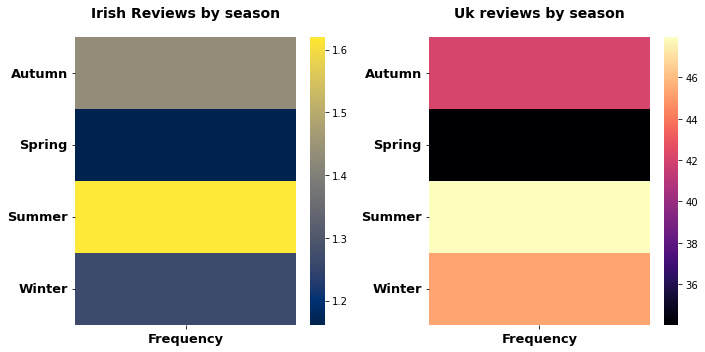

In [34]:
# Visualising the seasonal frequency using a heatmap from the functions results
# Easier representation via visualisation

Frequency_1 = pd.Series({
    'Autumn': 1.429907,
    'Spring': 1.161290,
    'Summer': 1.619469,
    'Winter': 1.266667,
}, name='Frequency')

Frequency_2 = pd.Series({
    'Autumn': 42.071112,
    'Spring': 34.039385,
    'Summer': 47.929733,
    'Winter': 45.309199,
}, name='Frequency')

Eire_season = Frequency_1.to_frame()
Uk_Season = Frequency_2.to_frame()

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

sns.heatmap(Eire_season, ax=axs[0], cmap='cividis')
sns.heatmap(Uk_Season, ax=axs[1], cmap='magma')


axs[0].set_title('Irish Reviews by season', pad=20, fontweight='bold', fontsize=14)
axs[1].set_title('Uk reviews by season', pad=20, fontweight='bold', fontsize=14)


for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=10, labelrotation=0)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(13)  
        label.set_weight('bold')  


plt.tight_layout()
plt.show()


<h3> Daily Timerfame <h3>

In [35]:
# gaining insights on the daily timeframe for the UK bus company- pre-processing step

df2['Date Posted'] = pd.to_datetime(df2['Date Posted'])

daily_uk = df2.groupby(pd.Grouper(key='Date Posted', freq='D')).size().reset_index(name='Frequency')

daily_uk

Date Posted  Frequency
0     2018-10-17          1
1     2018-10-18          0
2     2018-10-19          0
3     2018-10-20          0
4     2018-10-21          2
...          ...        ...
1903  2024-01-02         24
1904  2024-01-03          3
1905  2024-01-04          2
1906  2024-01-05          0
1907  2024-01-06          2

[1908 rows x 2 columns]

In [36]:
# gaining insights on the daily timeframe for the Irish bus company- pre-processing step

eire['Date Posted'] = pd.to_datetime(eire['Date Posted']) 

daily_eire = eire.groupby(pd.Grouper(key='Date Posted', freq='d')).size().reset_index(name='Frequency')

daily_eire

Date Posted  Frequency
0     2019-07-17          1
1     2019-07-18          0
2     2019-07-19          0
3     2019-07-20          0
4     2019-07-21          0
...          ...        ...
1630  2024-01-02          1
1631  2024-01-03          1
1632  2024-01-04          0
1633  2024-01-05          0
1634  2024-01-06          1

[1635 rows x 2 columns]

<h2>Eire company <h2>

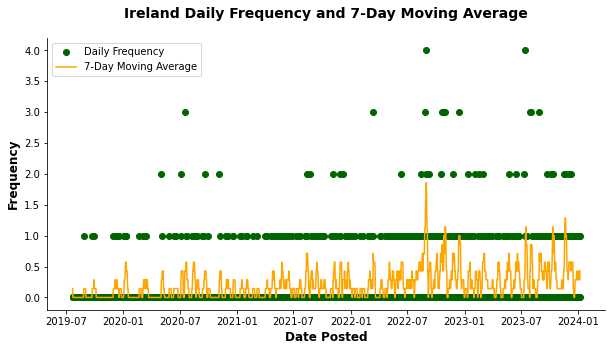

In [37]:
# Scatterplot to view the scatter of reviews against the day average for ireland
# Using a smoothing technique otherwise known as 7 day moving average 
# visualisng raw data against the moving average
# Visualising the results

daily_eire['Date Posted'] = pd.to_datetime(daily_eire['Date Posted'])

daily_eire['Frequency'] = pd.to_numeric(daily_eire['Frequency'], errors='coerce')

daily_eire['7_day_MA'] = daily_eire['Frequency'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(np.array(daily_eire['Date Posted'].iloc[6:]), np.array(daily_eire['Frequency'].iloc[6:]), marker='o', linestyle='', label='Daily Frequency', color='darkgreen')
plt.plot(np.array(daily_eire['Date Posted'].iloc[6:]), np.array(daily_eire['7_day_MA'].iloc[6:]), label='7-Day Moving Average', color='orange')

plt.title('Ireland Daily Frequency and 7-Day Moving Average', pad=20, fontweight='bold', fontsize=14)
plt.xlabel('Date Posted', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()


plt.show()

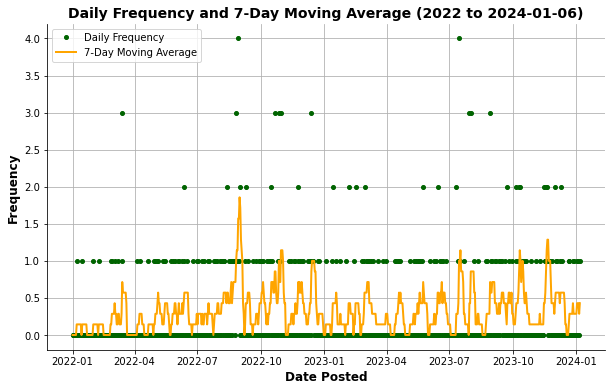

In [38]:
# Irish bus company
# zoomed up view of the transition from 2022 to 2024
# 2019-2024 somewhat illustrated an increase in reviews from a point in 2022
# This visual focuses on the later timeframe to inspect that point

daily_eire['Date Posted'] = pd.to_datetime(daily_eire['Date Posted'])

filtered_data = daily_eire[(daily_eire['Date Posted'] >= '2022-01-01') & (daily_eire['Date Posted'] <= '2024-01-06')]
filtered_data.loc[:, '7_day_MA'] = filtered_data['Frequency'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(10, 6))

plt.plot(filtered_data['Date Posted'].values, filtered_data['Frequency'].values, 'o', label='Daily Frequency', color='darkgreen', markersize=4)
plt.plot(filtered_data['Date Posted'].values, filtered_data['7_day_MA'].values, label='7-Day Moving Average', color='orange', linewidth=2)

plt.title('Daily Frequency and 7-Day Moving Average (2022 to 2024-01-06)', weight='bold', size=14)
plt.xlabel('Date Posted', weight='bold', size=12)
plt.ylabel('Frequency', weight='bold', size=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.grid(True)
plt.show()

<h2>UK Company <h2>

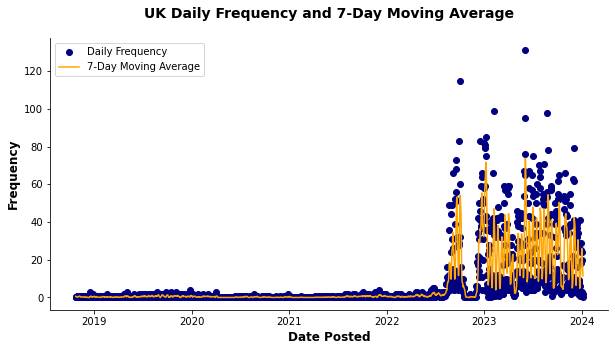

In [39]:
# Here I am viewing the scatter visual of daily frequencies for reviews
# Against the 7-day moving average for the UK bus service

daily_uk['Date Posted'] = pd.to_datetime(daily_uk['Date Posted'])

daily_uk['Frequency'] = pd.to_numeric(daily_uk['Frequency'], errors='coerce')

daily_uk['7_day_MA'] = daily_uk['Frequency'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(np.array(daily_uk['Date Posted'].iloc[6:]), np.array(daily_uk['Frequency'].iloc[6:]), marker='o', linestyle='', label='Daily Frequency', color='navy')
plt.plot(np.array(daily_uk['Date Posted'].iloc[6:]), np.array(daily_uk['7_day_MA'].iloc[6:]), label='7-Day Moving Average', color='orange')

plt.title('UK Daily Frequency and 7-Day Moving Average', pad=20, fontweight='bold', fontsize=14)
plt.xlabel('Date Posted', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend()

plt.show()


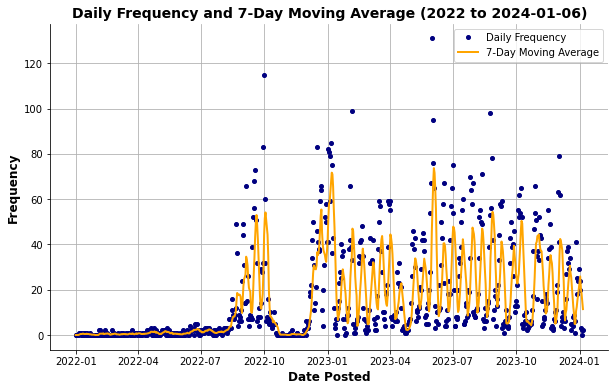

In [40]:
# Similar illustration in that the 2022 period appears to have a higher frequency than its prior
# a visual view of the transition from 2022 to 2024 for better inspection of that time period

daily_uk['Date Posted'] = pd.to_datetime(daily_uk['Date Posted'])

filtered_data = daily_uk[(daily_uk['Date Posted'] >= '2022-01-01') & (daily_uk['Date Posted'] <= '2024-01-06')]
filtered_data.loc[:, '7_day_MA'] = filtered_data['Frequency'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(10, 6))

plt.plot(filtered_data['Date Posted'].values, filtered_data['Frequency'].values, 'o', label='Daily Frequency', color='navy', markersize=4)
plt.plot(filtered_data['Date Posted'].values, filtered_data['7_day_MA'].values, label='7-Day Moving Average', linewidth=2, color='orange')

plt.title('Daily Frequency and 7-Day Moving Average (2022 to 2024-01-06)', weight='bold', size=14)
plt.xlabel('Date Posted', weight='bold', size=12)
plt.ylabel('Frequency', weight='bold', size=12)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend()
plt.grid(True)
plt.show()



<h2> Checking the Distributions <h2>

<h3> UK <h3>

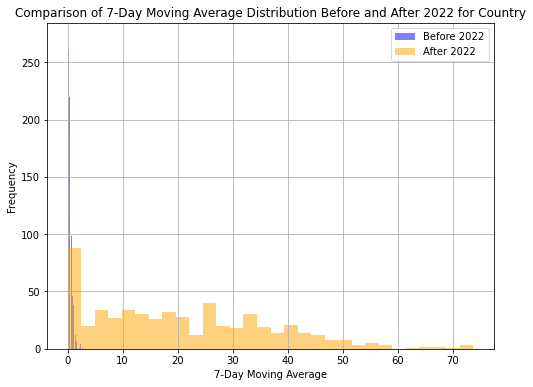

In [41]:
# Here we are viewing the distributions pre and post 2022 based on the scatter plots which imply growth

start_date_2018 = '2018-10-24'
end_date_2022 = '2022-07-01'
end_date_present = '2024-01-06'  

uk_before_2022 = daily_uk[(daily_uk['Date Posted'] >= start_date_2018) & (daily_uk['Date Posted'] < end_date_2022)]['7_day_MA']
uk_after_2022 = daily_uk[daily_uk['Date Posted'] >= end_date_2022]['7_day_MA']

plt.figure(figsize=(8, 6))

plt.hist(uk_before_2022, bins=30, alpha=0.5, color='blue', label='Before 2022')
plt.hist(uk_after_2022, bins=30, alpha=0.5, color='orange', label='After 2022')

plt.xlabel('No. of Reviews-moving average')
plt.ylabel('Frequency')
plt.title('Comparison of 7-Day Moving Average Distribution Before and After 2022 for Country')

plt.grid(True)

plt.legend()

plt.show()


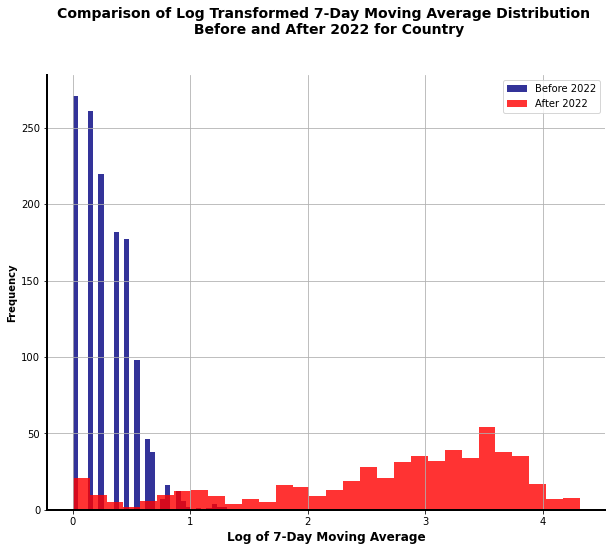

In [42]:
import numpy as np

# The distributions visualised a difference between the timeframes
# to make it visually clearly a log transform +1 was used
# the log helps visualise the magnitude not the original units
# the +1 is due to the existence of 0 values

# Apply log transformation
uk_before_2022_log = np.log(uk_before_2022 + 1)  # Adding 1 to handle zero values
uk_after_2022_log = np.log(uk_after_2022 + 1)  # Adding 1 to handle zero values

plt.figure(figsize=(10, 8))

# Plot histograms of the log-transformed data
plt.hist(uk_before_2022_log, bins=30, alpha=0.8, color='navy', label='Before 2022')
plt.hist(uk_after_2022_log, bins=30, alpha=0.8, color='red', label='After 2022')

plt.xlabel('No.of Reviews-moving average'), fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Comparison of Log Transformed 7-Day Moving Average Distribution \n Before and After 2022 for Country', y=1.08, fontsize=14, fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(2) 
plt.gca().spines['left'].set_linewidth(2)  
plt.grid(True)

plt.legend()

plt.show()


<h2> Distributions Ireland <h2>

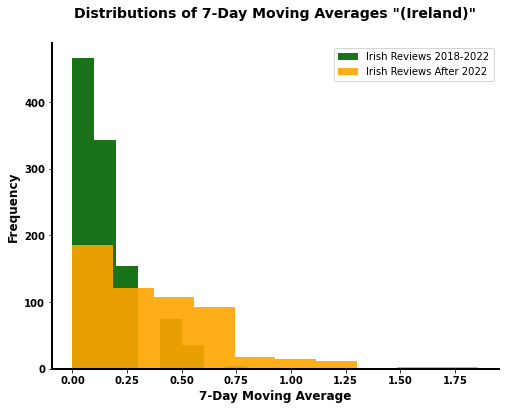

In [43]:
start_date_2019 = '2019-07-17'
end_date_2022 = '2022-07-01'
end_date_present = '2024-01-06'  

eire_before_2022 = daily_eire[(daily_eire['Date Posted'] >= start_date_2019) & (daily_eire['Date Posted'] < end_date_2022)]['7_day_MA']
eire_after_2022 = daily_eire[daily_eire['Date Posted'] >= end_date_2022]['7_day_MA']

plt.figure(figsize=(8, 6))

plt.hist(eire_before_2022, bins=10, alpha=0.9, color='darkgreen', label='Irish Reviews 2018-2022')
plt.hist(eire_after_2022, bins=10, alpha=0.9, color='orange', label='Irish Reviews After 2022')
plt.title('Distributions of 7-Day Moving Averages "(Ireland)"', weight='bold', size=14, pad=25)  
plt.xlabel('7-Day Moving Average', weight='bold', size=12)
plt.ylabel('Frequency', weight='bold', size=12)

plt.legend()


plt.gca().spines['bottom'].set_linewidth(2) 
plt.gca().spines['left'].set_linewidth(2)    


plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


<h2> Making an Inference about the diffrence in distributions<h2>

In [44]:
# the scatter plots and the distributions imply differences in the review frequencies between the two time periods
# Implementation of Mann Whitey to test
# null hypothesis is that there is no significant difference in the distribution 

from scipy import stats
U_stat, p_value_mannwhitney = stats.mannwhitneyu(eire_before_2022, eire_after_2022)
print(f"Mann-Whitney U Test: U-statistic = {U_stat}, p-value = {p_value_mannwhitney}")

Mann-Whitney U Test: U-statistic = 135593.0, p-value = 1.8988978700791307e-78


In [45]:
U_stat, p_value_mannwhitney = stats.mannwhitneyu(uk_before_2022, uk_after_2022)
print(f"Mann-Whitney U Test: U-statistic = {U_stat}, p-value = {p_value_mannwhitney}")

Mann-Whitney U Test: U-statistic = 33497.5, p-value = 1.8327718542749695e-216


Rejection of null hypothesis

<h2> Visualising Word frequency <h2>

In [46]:
# Next I want to look at the type of words and topics in the reviews
# A new frame is created extracting the date and text only

topic_eire_pre = pd.DataFrame({
    'text': eire['Review'],
    'date_posted' : eire['Date Posted']
})

topic_eire_post = pd.DataFrame({
    'text': eire['Review'],
    'date_posted' : eire['Date Posted']
})

In [47]:
# ensuring date posted is datetime dtype
topic_eire_pre['date_posted'] = pd.to_datetime(topic_eire_pre['date_posted'])
topic_eire_pre = topic_eire_pre[topic_eire_pre['date_posted'] <= '2022-07-07']

topic_eire_post['date_posted'] = pd.to_datetime(topic_eire_post['date_posted'])
topic_eire_post = topic_eire_post[topic_eire_post['date_posted'] >= '2022-07-08']

In [48]:
topic_uk_pre = pd.DataFrame({
    'text': df2['Review'],
    'date_posted' : df2['Date Posted']
})

topic_uk_post = pd.DataFrame({
    'text': df2['Review'],
    'date_posted' : df2['Date Posted']
})

In [49]:
topic_uk_pre = topic_uk_pre[topic_uk_pre['date_posted'] <= '2022-07-07']

topic_uk_post['date_posted'] = pd.to_datetime(topic_uk_post['date_posted'])
mask = topic_uk_post['date_posted'] >= '2022-07-08'
topic_uk_post = topic_uk_post[mask]


In [50]:
topic_uk_post.dtypes # ensuring this worked

text                   object
date_posted    datetime64[ns]
dtype: object

In [51]:
# I want to visualise the words in a word cloud
# so the following operations will create one long string with '' in between
# astype where the data had non string data

PRElong_stringuk = ' '.join(topic_uk_pre['text'])
PRElong_stringeire = ' '.join(topic_eire_pre['text'])
topic_uk_post['text'] = topic_uk_post['text'].astype(str)
POSlong_stringuk = ' '.join(topic_uk_post['text'])
POSlong_stringeire = ' '.join(topic_eire_post['text'])

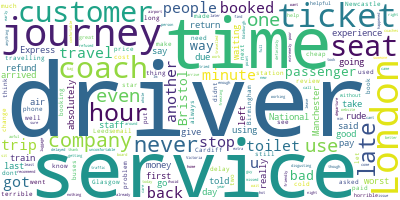

In [52]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    background_color='white',
    max_words=5000,
    contour_width=3,
    contour_color='steelblue',
    collocations=False,
)

wordcloud.generate(PRElong_stringuk)
wordcloud.to_image()

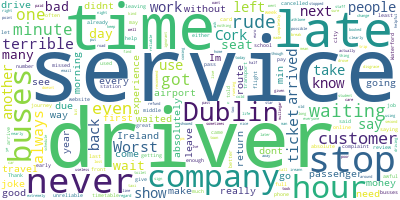

In [53]:
wordcloud2 = WordCloud(
    background_color='white',
    max_words=5000,
    contour_width=3,
    contour_color='steelblue',
    collocations=False,
)
wordcloud2.generate(PRElong_stringeire)
wordcloud2.to_image()

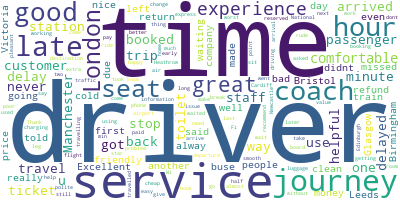

In [54]:
wordcloud3 = WordCloud(
    background_color='white',
    max_words=5000,
    contour_width=3,
    contour_color='steelblue',
    collocations=False,
)

wordcloud3.generate(POSlong_stringuk)
wordcloud3.to_image()

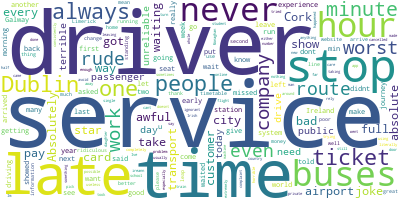

In [55]:
wordcloud4 = WordCloud(
    background_color='white',
    max_words=5000,
    contour_width=3,
    contour_color='steelblue',
    collocations=False,
)

wordcloud4.generate(POSlong_stringeire)
wordcloud4.to_image()

<h1> Text analysis </h1>

In [56]:
topicuk = pd.DataFrame({
    'text': eire['Review'],
    'date_posted' : eire['Date Posted']
})

topic_eire_post = pd.DataFrame({
    'text': eire['Review'],
    'date_posted' : eire['Date Posted']
})

In [57]:
topiceire = pd.DataFrame({
    'text': eire['Review'],
    'date_posted' : eire['Date Posted']
})

topic_eire_post = pd.DataFrame({
    'text': eire['Review'],
    'date_posted' : eire['Date Posted']
})

In [58]:
# function to process the sentences to have a list of words for each sentence
# This is a preprocessing step for Topic modelling

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [59]:
texts = topic_eire_pre['text'].values.tolist() # converting text column to a list
words = list(sent_to_words(texts)) # applying the function to have a list of words for each sentence

In [60]:
text2 = topic_eire_post['text'].values.tolist() # converting text column to a list
word2 = list(sent_to_words(text2)) # applying the function to have a list of words for each sentence

In [61]:
words[4] # quick check it worked (pre 2022)

['accept',
 'apple',
 'pay',
 'everytime',
 'late',
 'awful',
 'staff',
 'soooooooo',
 'mean',
 'the',
 'leaking',
 'outside',
 'got',
 'soggy',
 'ewww',
 'student',
 'discount',
 'very',
 'inconvenient',
 'student',
 'like',
 'me']

In [62]:
word2[4] # post 2022

['so',
 'useless',
 'so',
 'useless',
 'the',
 'times',
 'schedules',
 'difficult',
 'predict',
 'irish',
 'weather',
 'standing',
 'stop',
 'parnell',
 'avenue',
 'galway',
 'missed',
 'scheduled',
 'departures',
 'you',
 'quicker',
 'walking']

In [63]:
# the next preprocessing step is to create a dictionary for Latent Dirichlet Allocation
id2words = corpera.Dictionary(words) # pre 22

In [64]:
id2words2 = corpera.Dictionary(word2) # post 22

In [65]:
# This step is converting the text into a bag of words to each text in words stored in variable corpus
corpus = [id2words.doc2bow(texts) for texts in words] # Ireland

In [66]:
corpus2 = [id2words2.doc2bow(text2) for text2 in word2] #UK

In [67]:
corpus2

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 2),
  (11, 1)],
 [(5, 2),
  (6, 1),
  (8, 1),
  (10, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 2),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 3),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 2),
  (65, 3),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 2),
  (87, 2),


In [68]:
corpus # quick check to see if it worked

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 2),
  (9, 2),
  (10, 1)],
 [(11, 3),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 2),
  (20, 1)],
 [(21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 3),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1)],
 [(27, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 3),
  (58, 1),
  (59, 1)],
 [(30, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 1)],
 [(80, 1), (81, 1), (82, 1), (83, 3), (84, 2), (85, 1)],
 [(11, 1),
  (21, 1),
  (27, 1),
  (45, 2),
  

In [69]:
len(corpus2)

357

In [70]:
len(corpus)

150

In [71]:
len(words)

150

In [72]:
len(word2)

357

<h2> Pre 2022 landscape Text Analysis- Ireland <h2>

In [73]:
# 3, 5 and 10 topics were tested but topics were highly similar, 
# Evidence of this can be seen in the visualisation using 5 topics

num_topics = 5 

lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2words,
    alpha='auto',  # You can set this to a scalar or 'auto'
    eta='auto',
    num_topics=num_topics,
    random_state=42

)

In [74]:
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model,
    corpus,
    id2words                                     
                                         
)

In [75]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.032539  0.021099       1        1  38.166618
2      0.038856 -0.041812       2        1  22.379896
4      0.005152  0.038508       3        1  18.230955
0     -0.032728 -0.003614       4        1  15.194191
1     -0.043818 -0.014182       5        1   6.028340, topic_info=        Term        Freq       Total Category  logprob  loglift
85   service  117.000000  117.000000  Default  30.0000  30.0000
27    driver   64.000000   64.000000  Default  29.0000  29.0000
45        he   14.000000   14.000000  Default  28.0000  28.0000
67      late   47.000000   47.000000  Default  27.0000  27.0000
83      mins   18.000000   18.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
85   service    1.426973  117.651944   Topic5  -5.5927  -1.6035
499       ve    1.057493   16.491913   Topic5  -5.8924   0.0617
316     even    1.084603   28.861044   Topic5  -5.8671  -0.4726
240    buses    1.033735   30.216859   Topic5  -5.9151  -0.5665
276   always    1.007723   22.474407   Topic5  -5.9406  -0.2960

[399 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
104       1  0.450088  absolutely
104       2  0.180035  absolutely
104       3  0.180035  absolutely
104       4  0.180035  absolutely
104       5  0.090018  absolutely
...     ...       ...         ...
20        1  0.218836       years
20        2  0.218836       years
20        3  0.437673       years
818       1  0.257778        zero
818       4  0.515555        zero

[671 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 1, 2])

In [76]:
from gensim.models import CoherenceModel

In [77]:
perplexity = lda_model.log_perplexity(corpus)
coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=id2words, coherence='c_v')
coherence = coherence_model.get_coherence()

print(f"Perplexity: {perplexity}")
print(f"Coherence: {coherence}")

Perplexity: -7.416922498086979
Coherence: nan


C:\Users\melis\anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in divide
  numerator = (co_occur_count / num_docs) + EPSILON
C:\Users\melis\anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
C:\Users\melis\anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:198: RuntimeWarning: invalid value encountered in divide
  co_doc_prob = co_occur_count / num_docs


In [78]:
lda_model.print_topics()

[(0,
  '0.009*"time" + 0.008*"driver" + 0.007*"get" + 0.007*"got" + 0.007*"waiting" + 0.006*"buses" + 0.006*"never" + 0.005*"could" + 0.005*"like" + 0.005*"would"'),
 (1,
  '0.010*"driver" + 0.007*"late" + 0.007*"time" + 0.005*"he" + 0.005*"never" + 0.005*"company" + 0.004*"airport" + 0.004*"rude" + 0.004*"one" + 0.004*"the"'),
 (2,
  '0.035*"service" + 0.014*"time" + 0.011*"late" + 0.011*"driver" + 0.009*"never" + 0.008*"rude" + 0.008*"drivers" + 0.007*"the" + 0.006*"mins" + 0.005*"customer"'),
 (3,
  '0.016*"service" + 0.015*"the" + 0.013*"get" + 0.011*"stop" + 0.010*"driver" + 0.010*"time" + 0.008*"late" + 0.007*"drivers" + 0.006*"minutes" + 0.006*"never"'),
 (4,
  '0.019*"service" + 0.011*"driver" + 0.008*"time" + 0.007*"get" + 0.006*"the" + 0.006*"terrible" + 0.006*"even" + 0.006*"never" + 0.006*"stop" + 0.005*"travel"')]

In [79]:
num_topics = lda_model.num_topics

topic_names = {
    0: 'Waiting for the Bus Service',
    1: 'Late Driver',
    2: 'Rude Driver',
    3: 'Timings',
    4: 'Service Stops',
}

for i in range(num_topics):
    topic_terms = lda_model.show_topic(i)
    topic_terms_str = ', '.join([f'{term[0]} ({term[1]:.2f})' for term in topic_terms])
    print(f'{topic_names[i]}: {topic_terms_str}')

Waiting for the Bus Service: time (0.01), driver (0.01), get (0.01), got (0.01), waiting (0.01), buses (0.01), never (0.01), could (0.01), like (0.01), would (0.01)
Late Driver: driver (0.01), late (0.01), time (0.01), he (0.01), never (0.00), company (0.00), airport (0.00), rude (0.00), one (0.00), the (0.00)
Rude Driver: service (0.04), time (0.01), late (0.01), driver (0.01), never (0.01), rude (0.01), drivers (0.01), the (0.01), mins (0.01), customer (0.01)
Timings: service (0.02), the (0.02), get (0.01), stop (0.01), driver (0.01), time (0.01), late (0.01), drivers (0.01), minutes (0.01), never (0.01)
Service Stops: service (0.02), driver (0.01), time (0.01), get (0.01), the (0.01), terrible (0.01), even (0.01), never (0.01), stop (0.01), travel (0.01)


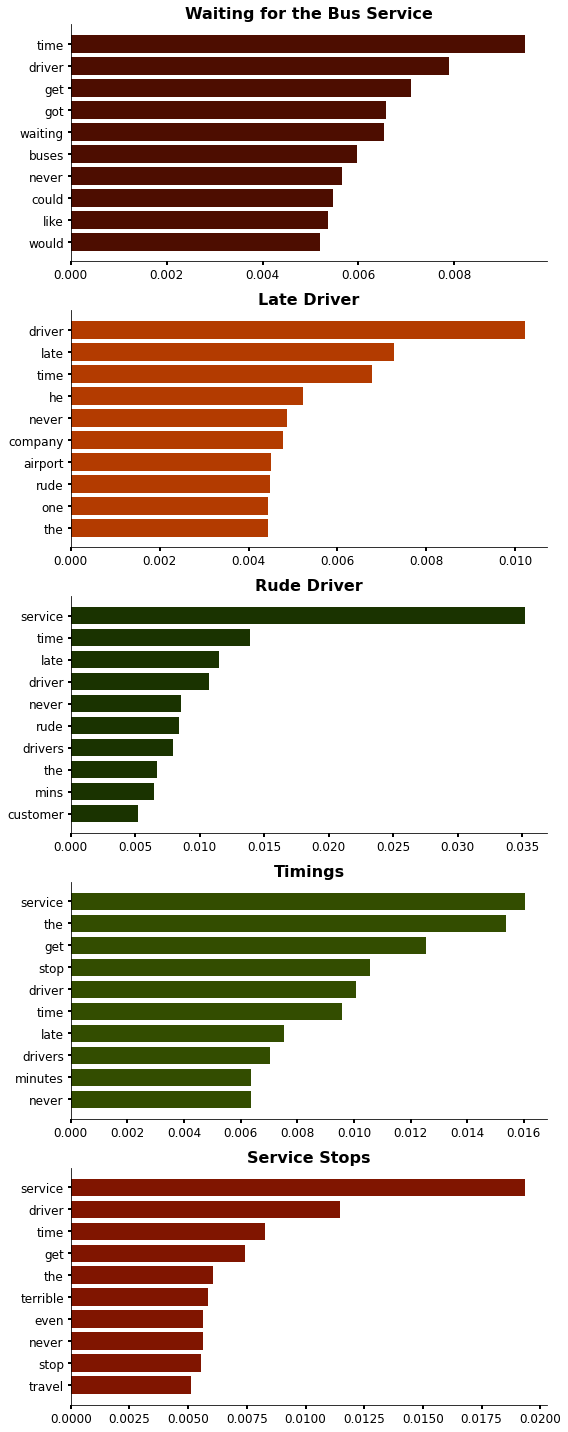

In [80]:
num_topics = 5
num_terms = 10  


colors = [
    '#4D0D00',  
    '#B33B00',  
    '#1A3300',  
    '#334D00', 
    '#801500'   
]


topic_names = [ 
    'Waiting for the Bus Service',
    'Late Driver',
    'Rude Driver',
    'Timings',
    'Service Stops',
]


fig, axs = plt.subplots(num_topics, figsize=(8, 4 * num_topics))

for i in range(num_topics):
    topic_terms = lda_model.show_topic(i, topn=num_terms)
    axs[i].barh(range(num_terms), [term[1] for term in topic_terms], color=colors[i])
    axs[i].set_yticks(range(num_terms))
    axs[i].set_yticklabels([term[0] for term in topic_terms])
    axs[i].invert_yaxis()
    axs[i].set_title(topic_names[i], fontsize=16, fontweight='bold')  
   
    axs[i].tick_params(axis='x', labelsize=12, width=2)  
    axs[i].tick_params(axis='y', labelsize=12, width=2)  

    
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

<h2> Post 2022 landscape- Text Analysis- Ireland  <h2>

In [81]:
num_topics2 = 5 

lda_model2 = gensim.models.LdaMulticore(
    corpus=corpus2,
    id2word=id2words2,
    num_topics=num_topics2,
    random_state=42

)

In [82]:
LDAvis_prepared2 = pyLDAvis.gensim.prepare(
    lda_model2,
    corpus2,
    id2words2                                     
                                         
)

In [83]:
LDAvis_prepared2

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.002850 -0.003450       1        1  26.559624
0      0.001040 -0.020054       2        1  23.726404
3      0.026769 -0.016894       3        1  21.607551
4     -0.045249  0.001780       4        1  16.805885
1      0.014591  0.038618       5        1  11.300537, topic_info=        Term        Freq       Total Category  logprob  loglift
76   service  254.000000  254.000000  Default  30.0000  30.0000
152     stop   95.000000   95.000000  Default  29.0000  29.0000
84       the  130.000000  130.000000  Default  28.0000  28.0000
43       get  123.000000  123.000000  Default  27.0000  27.0000
802     card   32.000000   32.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
34    dublin    5.621893   73.502426   Topic5  -5.6976  -0.3903
62    people    5.444570   67.118892   Topic5  -5.7297  -0.3315
55      late    6.409150  141.005575   Topic5  -5.5666  -0.9108
87     times    4.853914   48.814065   Topic5  -5.8445  -0.1279
201     even    4.650241   62.677877   Topic5  -5.8874  -0.4208

[429 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
706       1  0.205426  absolute
706       2  0.136951  absolute
706       3  0.239663  absolute
706       4  0.308139  absolute
706       5  0.136951  absolute
...     ...       ...       ...
97        3  0.140983     years
97        4  0.140983     years
97        5  0.046994     years
1551      2  0.696004     youre
1551      3  0.232001     youre

[807 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 5, 2])

In [84]:
lda_model2.print_topics()

[(0,
  '0.014*"service" + 0.013*"driver" + 0.012*"late" + 0.010*"stop" + 0.010*"the" + 0.009*"time" + 0.008*"get" + 0.007*"buses" + 0.007*"people" + 0.006*"drivers"'),
 (1,
  '0.018*"service" + 0.012*"time" + 0.011*"get" + 0.008*"stop" + 0.007*"driver" + 0.005*"buses" + 0.005*"this" + 0.005*"one" + 0.005*"hour" + 0.005*"waiting"'),
 (2,
  '0.016*"service" + 0.013*"time" + 0.011*"driver" + 0.009*"get" + 0.009*"late" + 0.008*"never" + 0.006*"buses" + 0.006*"stop" + 0.006*"dublin" + 0.006*"drivers"'),
 (3,
  '0.025*"service" + 0.011*"time" + 0.011*"the" + 0.011*"never" + 0.008*"get" + 0.008*"late" + 0.008*"buses" + 0.007*"driver" + 0.007*"always" + 0.007*"drivers"'),
 (4,
  '0.013*"service" + 0.013*"the" + 0.012*"late" + 0.011*"driver" + 0.008*"minutes" + 0.007*"time" + 0.007*"drivers" + 0.007*"company" + 0.006*"it" + 0.005*"got"')]

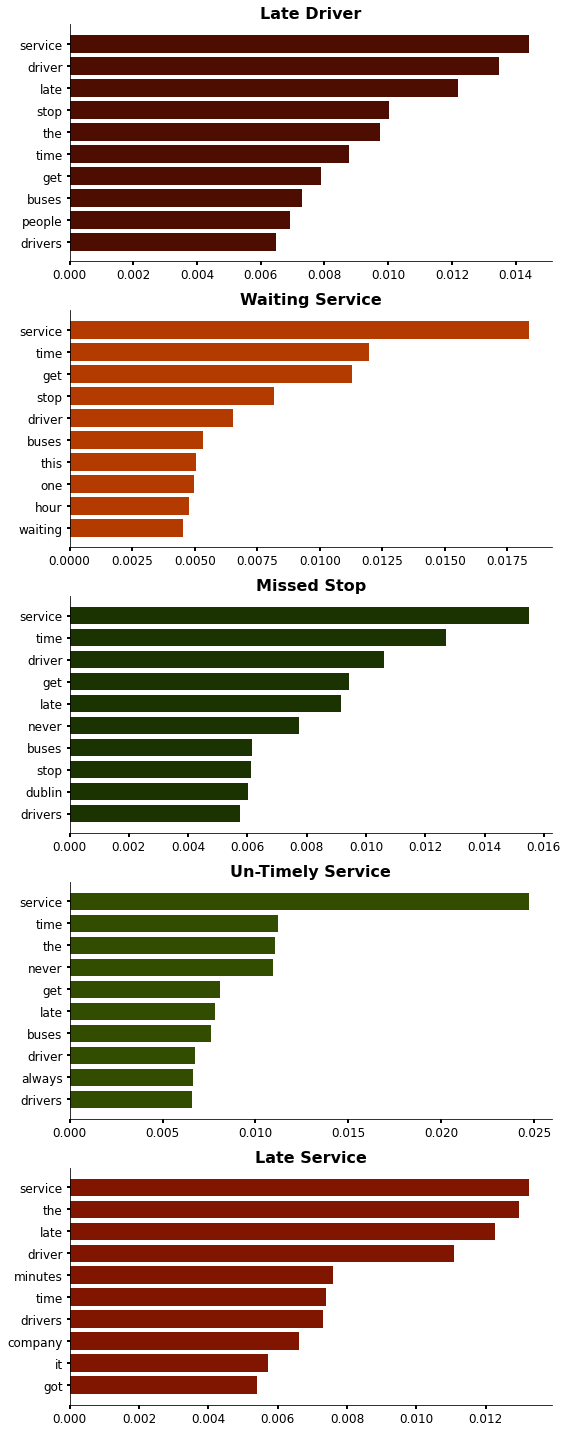

In [85]:
num_topics = 5
num_terms = 10  


colors = [
    '#4D0D00',  
    '#B33B00',  
    '#1A3300',  
    '#334D00', 
    '#801500'   
]


topic_names = [ 
    'Late Driver',
    'Waiting Service',
    'Missed Stop',
    'Un-Timely Service',
    'Late Service',
]


fig, axs = plt.subplots(num_topics, figsize=(8, 4 * num_topics))

for i in range(num_topics):
    topic_terms = lda_model2.show_topic(i, topn=num_terms)
    axs[i].barh(range(num_terms), [term[1] for term in topic_terms], color=colors[i])
    axs[i].set_yticks(range(num_terms))
    axs[i].set_yticklabels([term[0] for term in topic_terms])
    axs[i].invert_yaxis()
    axs[i].set_title(topic_names[i], fontsize=16, fontweight='bold')  

    
    axs[i].tick_params(axis='x', labelsize=12, width=2)  
    axs[i].tick_params(axis='y', labelsize=12, width=2)  #

    
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

<h1>Sentiment Analysis</h1>

In [86]:
topic_eire_pre # frame for pre 2022 IRELAND

text date_posted
178  I'm Upset I'm Upset I missed timetable font si...  2022-03-13
181  I started working company I started working co...  2022-06-11
209  driver Derek 100 X Route I lost phone Dublin A...  2022-07-02
210  Thank driver Thomas Thank driver Thomas Limeri...  2022-06-30
211  DISGUSTINGoverpriced , accept Apple pay , ever...  2022-06-24
..                                                 ...         ...
352  Not reliable one bit Not reliable one bit,why ...  2019-12-01
353  .... ..... Where I start? Always never time, p...  2019-09-30
354  Not sure defined Not sure defined service?! Bu...  2019-09-24
355  Worst customer service Worst customer service....  2019-08-28
356  Absolutely awful service!! Absolutely awful se...  2019-07-17

[150 rows x 2 columns]

In [87]:
# Ensuring datetime type on irish frames
topic_eire_pre['date_posted'] = pd.to_datetime(topic_eire_pre['date_posted'])
topic_eire_pre = topic_eire_pre[topic_eire_pre['date_posted'] <= '2022-07-07']

topic_eire_post['date_posted'] = pd.to_datetime(topic_eire_post['date_posted'])
topic_eire_post = topic_eire_post[topic_eire_post['date_posted'] >= '2022-07-08']

In [88]:
# ensuring datetime types on UK frames
topic_uk_pre = topic_uk_pre[topic_uk_pre['date_posted'] <= '2022-07-07']

topic_uk_post['date_posted'] = pd.to_datetime(topic_uk_post['date_posted'])
mask = topic_uk_post['date_posted'] >= '2022-07-08'
topic_uk_post = topic_uk_post[mask]

In [89]:
from nltk.sentiment import SentimentIntensityAnalyzer 

In [90]:
sia = SentimentIntensityAnalyzer() # abbreviating

In [91]:
#testing
sia.polarity_scores("Just went 115 dublin toJust went 115 dublin mullingar heuston 18:50 welcomed driver legs spread chair thats all, going maynooth university change plans get groceries went uni tried leave stop beside train station screamed told sit said ever sees would refuse service atrocious language behaviour wanting get earlier stop. Not consistently cancelled delayed buses also extremely rude drivers. I take weekly never problem wanted leave earlier not. Terrible company another faster would take day terrible ass .") # test

{'neg': 0.228, 'neu': 0.657, 'pos': 0.114, 'compound': -0.8616}

In [92]:
# I want to apply the compound score to each sentence
# This is a generalized approach to the sentiment as opposed to dissecting the negative neutral and positive ratings of text
import statistics

def compound_score(clean_text):
    scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(clean_text)]
    return statistics.mean(scores)

In [93]:
compound_score(topic_eire_pre['text'].iloc[0]) #test

-0.7906

In [94]:
print(topic_eire_pre['text'].iloc[0]) #test

I'm Upset I'm Upset I missed timetable font size small read I miss read timetable wait another 20 minutes


In [95]:
#applying the compound score to each review in a new column

topic_eire_pre["Compound Scores"] = topic_eire_pre["text"].apply(compound_score)
topic_eire_post["Compound Scores"] = topic_eire_post["text"].apply(compound_score)
topic_uk_pre ["Compound Scores"] = topic_uk_pre["text"].apply(compound_score)
topic_uk_post["Compound Scores"] = topic_uk_post["text"].apply(compound_score)

In [96]:
topic_eire_pre.head(20)

text date_posted  \
178  I'm Upset I'm Upset I missed timetable font si...  2022-03-13   
181  I started working company I started working co...  2022-06-11   
209  driver Derek 100 X Route I lost phone Dublin A...  2022-07-02   
210  Thank driver Thomas Thank driver Thomas Limeri...  2022-06-30   
211  DISGUSTINGoverpriced , accept Apple pay , ever...  2022-06-24   
212  Scandalous 1 30mins Scandalous 1 30mins !! A s...  2022-06-16   
213  Last Friday evening Last Friday evening, I nic...  2022-06-12   
214  Lost Property I left pair glasses went aras se...  2022-06-11   
215  A terrible service Was waiting No32 Letterkenn...  2022-06-09   
216  The worst company ever The worst company ever....  2022-06-04   
217  Rude aggressive clueless driver I got 51 cork ...  2022-06-03   
218  Contempt customers Contempt customers. No cust...  2022-05-29   
219  driver 208 Dublin fella driver 208 Dublin fell...  2022-05-26   
220  Worst service Worst service , bought ticket on...  2022-05-24   
221  KIND DRIVER BUSEIRREAN 133 It Sunday night, Ma...  2022-05-15   
222                            Useless never comes tim  2022-05-14   
223  service disaster 40 mins late service disaster...  2022-05-12   
224  32 BUSThe 32 Letterkenny Dublin never time pic...  2022-05-05   
225  Absolutely terrible service Absolutely terribl...  2022-05-04   
226  I wish leave review Frank I wish leave review ...  2022-05-01   

     Compound Scores  
178         -0.79060  
181          0.59840  
209          0.12630  
210          0.20315  
211         -0.09200  
212         -0.40590  
213          0.31502  
214          0.36335  
215         -0.07184  
216         -0.29095  
217         -0.99020  
218         -0.21865  
219          0.00000  
220         -0.27605  
221          0.69520  
222         -0.42150  
223         -0.91360  
224          0.00000  
225         -0.38870  
226          0.39420

In [97]:
topic_eire_pre.sort_values("Compound Scores", ascending=False) # arranging them in descending order

text date_posted  \
314  These drivers great job These drivers great jo...  2020-09-19   
292  Extremely unreliable Honestly, giving company ...  2021-05-07   
288  Great way get around Great way get around Ireland  2021-05-24   
260  UPDATE: I refer previous review pleased acknow...  2021-10-07   
241  I waiting 11:40 I waiting 11:40 7th January 20...  2022-01-07   
..                                                 ...         ...   
271  I waiting I I waiting I got get rude keep mind...  2021-08-24   
254  Ducking idiot drivers time tables Ducking idio...  2021-11-15   
223  service disaster 40 mins late service disaster...  2022-05-12   
322  Driver stopping stops The driver stop stop com...  2020-08-12   
217  Rude aggressive clueless driver I got 51 cork ...  2022-06-03   

     Compound Scores  
314           0.9231  
292           0.8603  
288           0.8481  
260           0.8402  
241           0.7549  
..               ...  
271          -0.8625  
254          -0.8658  
223          -0.9136  
322          -0.9633  
217          -0.9902  

[150 rows x 3 columns]

In [98]:
# assigning a class in a new column based on the score
topic_eire_pre['new_group'] = topic_eire_pre['Compound Scores'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [99]:
# applying to other frames
dataframes = [topic_eire_post, topic_uk_pre, topic_uk_post]

for df in dataframes:
    df['new_group'] = df['Compound Scores'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))


In [100]:
topic_eire_post.tail(60)

text date_posted  \
147  Missed Flight We travelling airport catch flig...  2022-12-09   
148  Absolutely disgraceful drivers Absolutely disg...  2022-11-20   
149  I take 220 daily drivers rude I take 220 daily...  2022-08-27   
150  Rude driver The driver rude passengers. Absolu...  2022-12-23   
151  You can't rely Galway You can't rely Galway ci...  2022-08-09   
152  Poor No buses. Other people getting trained co...  2022-09-29   
153  Rude drive 101x 07;37am driver rude me.was try...  2022-10-21   
154  The Driver Expressway 30 The Driver Expressway...  2023-03-31   
155  The worst thing ever experience The worst thin...  2022-12-13   
156  The driver didnt stop The driver didnt stop st...  2023-02-15   
157  Absolutely appalling service Absolutely appall...  2023-01-18   
158  The timetable The timetable rubbish buses alwa...  2022-10-27   
159  Regular relucant user Regular relucant user. A...  2023-01-24   
160  Arrogant. Listen. Im trying like service. I re...  2023-02-24   
161  Terrible Absolutely disgraceful handling passe...  2022-11-24   
162  225 cork always delayed driver225 cork always ...  2023-06-14   
163  Just avoid stress walk. I can't tell many time...  2022-10-17   
164  Good service dirty Good service comfortable se...  2023-07-22   
165  Just awful unreliable service Just awful unrel...  2023-04-18   
166  Worst service ever Worst service ever. Tried g...  2022-08-28   
167  Dogsh*t service Dogsh*t service, worst transpo...  2023-10-14   
168  Complete idiot ignorant Complete idiot ignoran...  2023-03-04   
169  The listowel tralee always 25 The listowel tra...  2022-08-13   
170  Absolutely worse service I Absolutely worse se...  2023-06-22   
171  Hate Was going get last Dublin Wicklow cancell...  2022-08-25   
172  Booking paying ticket even Booking paying tick...  2022-08-13   
173  complete disaster Unfortunately, service deal ...  2023-09-15   
174  Waited 40 minutes outside Apple Cork Waited 40...  2022-08-18   
175  The Magic Invisible Service non-existent despi...  2023-07-15   
176  Today I experienced horrible Today I experienc...  2023-02-28   
177  Your website really hard navigate Your website...  2023-01-03   
179  School buses total mess School buses total mes...  2023-09-14   
180  takes 2hrs get takes 2hrs get Dublin Dundalk, ...  2023-02-05   
182  61 Galway Sligo most61 Galway Sligo depressing...  2022-09-28   
183  Just get rid locals Just get rid locals hire n...  2022-10-16   
184     214 always latebus always late 2 hrs sometimes  2023-09-13   
185                              You can't count them.  2023-12-22   
186  More 1 hour waiting 103 More 1 hour waiting 10...  2022-12-14   
187  The worst busses ever The worst busses ever , ...  2023-07-30   
188  W3 Waterford City Dirty dusty seats W3 Waterfo...  2023-03-03   
189  1 hour 40 minutes latebus 1 hour 40 minutes la...  2022-11-18   
190  Very late 15 minutes Very late 15 minutes acce...  2023-05-24   
191         I love fun I love I love fun I love love z  2023-06-20   
192  Why take long Why take long arrive. Over 40 mi...  2023-05-05   
193  The first I've taken 1:30 H The first I've tak...  2022-08-26   
194                       L L L wifi, stop circle k :(  2022-09-09   
195                          2 hours late route 214...  2023-11-24   
196  Horrible journey Horrible journey, late, expen...  2022-08-26   
197                                   Tossers !!!!!!!!  2023-12-02   
198                    Dreadful transportation company  2023-10-10   
199            Always late Always late, unreliable!!!!  2022-11-24   
200  POO! TERRIBE!! absolute poop services waiting ...  2022-08-06   
201  The nice great talk The nice great talk great ...  2022-08-05   
202  Worst Ireland far The 100x dundalk Dublin runs...  2022-08-02   
203  WORST IN IRELAND!!! WORST IN IRELAND!!!! YOUR ...  2022-07-30   
204  Never time never count Never time never count ...  2022-07-26   
205  inspectors Dublin Airport My Daughter I arrive...  2022

<h1> Visualising Review Sentiment <h1>

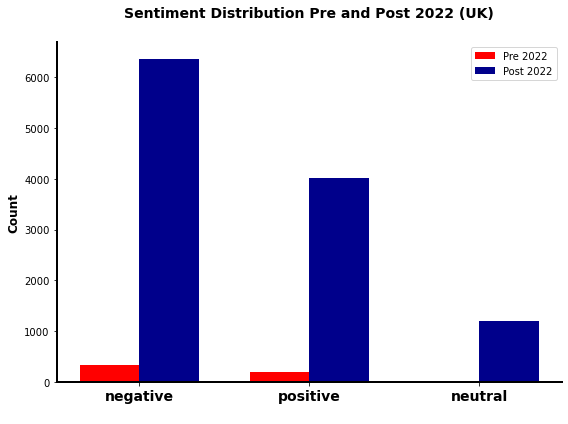

In [101]:
import matplotlib.pyplot as plt


pre_counts = topic_uk_pre['new_group'].value_counts()
post_counts = topic_uk_post['new_group'].value_counts()


sentiments = topic_eire_pre['new_group'].unique()  
x = range(len(sentiments))

# Define bar width
bar_width = 0.35

pre_color = 'red'
post_color = 'darkblue'


plt.figure(figsize=(8, 6))

plt.bar(x, pre_counts, width=bar_width, label='Pre 2022', color=pre_color)
plt.bar([pos + bar_width for pos in x], post_counts, width=bar_width, label='Post 2022', color=post_color)


plt.title('Sentiment Distribution Pre and Post 2022 (UK)', weight='bold', size=14, pad=25)
plt.xlabel(' ')
plt.ylabel('Count', weight='bold', size=12)
plt.xticks([pos + bar_width / 2 for pos in x], sentiments, weight='bold', size=14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().spines['bottom'].set_linewidth(2) 
plt.gca().spines['left'].set_linewidth(2) 

plt.legend()

plt.tight_layout()
plt.show()


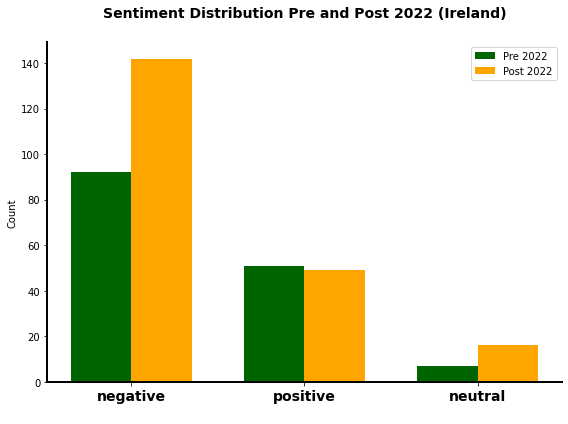

In [102]:
pre_counts = topic_eire_pre['new_group'].value_counts()
post_counts = topic_eire_post['new_group'].value_counts()

sentiments = topic_eire_pre['new_group'].unique()  
x = range(len(sentiments))

bar_width = 0.35

pre_color = 'darkgreen'
post_color = 'orange'


plt.figure(figsize=(8, 6))

plt.bar(x, pre_counts, width=bar_width, label='Pre 2022', color=pre_color)
plt.bar([pos + bar_width for pos in x], post_counts, width=bar_width, label='Post 2022', color=post_color)

plt.title('Sentiment Distribution Pre and Post 2022 (Ireland)', weight='bold', size=14, pad=25)
plt.xlabel(' ')
plt.ylabel('Count')
plt.xticks([pos + bar_width / 2 for pos in x], sentiments, weight='bold', size=14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().spines['bottom'].set_linewidth(2) 
plt.gca().spines['left'].set_linewidth(2) 

plt.legend()

plt.tight_layout()
plt.show()


In [103]:
topic_eire_post

text date_posted  \
0    conya They never time one Im waiting 19:50 got...  2024-01-02   
1    Worst transport Ireland This service great exa...  2024-01-03   
2    Has worst transport service Has worst transpor...  2023-12-29   
3    The unreliable service No unsure arrive, arriv...  2023-12-11   
4    So useless So useless. The times schedules dif...  2023-12-09   
..                                                 ...         ...   
204  Never time never count Never time never count ...  2022-07-26   
205  inspectors Dublin Airport My Daughter I arrive...  2022-07-25   
206  You never get away this! You never get away th...  2022-07-17   
207  NEVER ON TIMEAnd question: If I miss flight du...  2022-07-11   
208                                    Never fails dis  2022-07-08   

     Compound Scores new_group  
0          -0.381800  negative  
1          -0.145636  negative  
2          -0.080933  negative  
3          -0.110350  negative  
4          -0.420150  negative  
..               ...       ...  
204         0.400700  positive  
205         0.348767  positive  
206         0.059300  positive  
207        -0.616600  negative  
208         0.325200  positive  

[207 rows x 4 columns]

<h1> Naiive Bayes </h1>

In [104]:
# concatenating pre and post irish frames
# this is for building a classifier for positive and negative assignments

combined_df = pd.concat([topic_eire_post, topic_eire_pre])

combined_df.reset_index(drop=True, inplace=True)

In [105]:
import sklearn.feature_extraction.text as sk_txt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from wordcloud import WordCloud


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing 


In [106]:
# Iteration 1- 
#Step 1: Vectorizer to create a bag of words, train test split 80/20
# fit naive bayes baseline model

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(combined_df['text'])

y = combined_df['new_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85        53
     neutral       0.00      0.00      0.00         6
    positive       0.50      0.38      0.43        13

    accuracy                           0.75        72
   macro avg       0.43      0.44      0.43        72
weighted avg       0.67      0.75      0.71        72



C:\Users\melis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\melis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Noticed an issue with classification of neutral

In [107]:
print("Length of X: ", X.shape[0])
print("Length of y: ", len(y))


Length of X:  357
Length of y:  357


In [108]:
# creating a new df to inspect neutral rows
new_df = combined_df[combined_df['new_group'] == 'neutral']


In [109]:
new_df.tail(60)

text date_posted  \
9    Drivers drive past even Drivers drive past eve...  2024-01-06   
86   always late115x mullingar always late. I dont ...  2022-12-15   
94   I get 226 work airport I get 226 work airport ...  2023-09-05   
110  L58 NEVER ON TIMEWhenever take l58 NEVER time ...  2023-06-14   
130  Service Dublin Cork always anywhere Service Du...  2022-08-16   
138  way way hot way way hot stuffy I breath driver...  2022-12-16   
174  Waited 40 minutes outside Apple Cork Waited 40...  2022-08-18   
175  The Magic Invisible Service non-existent despi...  2023-07-15   
182     214 always latebus always late 2 hrs sometimes  2023-09-13   
183                              You can't count them.  2023-12-22   
184  More 1 hour waiting 103 More 1 hour waiting 10...  2022-12-14   
188  Very late 15 minutes Very late 15 minutes acce...  2023-05-24   
190  Why take long Why take long arrive. Over 40 mi...  2023-05-05   
193                          2 hours late route 214...  2023-11-24   
195                                   Tossers !!!!!!!!  2023-12-02   
197            Always late Always late, unreliable!!!!  2022-11-24   
219  driver 208 Dublin fella driver 208 Dublin fell...  2022-05-26   
224  32 BUSThe 32 Letterkenny Dublin never time pic...  2022-05-05   
252                                     late 40 min!!!  2021-11-26   
253                               The 25 minutes late!  2021-11-26   
275  The website inefficient The website inefficien...  2021-08-10   
317  If I could give zero stars I would If I could ...  2020-09-12   
352  Not reliable one bit Not reliable one bit,why ...  2019-12-01   

     Compound Scores new_group  
9                0.0   neutral  
86               0.0   neutral  
94               0.0   neutral  
110              0.0   neutral  
130              0.0   neutral  
138              0.0   neutral  
174              0.0   neutral  
175              0.0   neutral  
182              0.0   neutral  
183              0.0   neutral  
184              0.0   neutral  
188              0.0   neutral  
190              0.0   neutral  
193              0.0   neutral  
195              0.0   neutral  
197              0.0   neutral  
219              0.0   neutral  
224              0.0   neutral  
252              0.0   neutral  
253              0.0   neutral  
275              0.0   neutral  
317              0.0   neutral  
352              0.0   neutral

In [110]:
# Wrong assignment identified neutral is negative will be corrected

In [111]:
# new frame for the next run of classifier
Naiive = combined_df.copy()
Naiive.loc[Naiive['new_group'] == 'neutral', 'new_group'] = 'negative'

In [112]:
# Iteration 2-
#Step 1: re-assigned groups vectorized to a bag of words, split 80/20, model run

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Naiive['text'])

y = Naiive['new_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.87      0.92      0.89        59
    positive       0.50      0.38      0.43        13

    accuracy                           0.82        72
   macro avg       0.69      0.65      0.66        72
weighted avg       0.80      0.82      0.81        72



Improvements but still having issues with the positive class, may be due to class imbalance

In [113]:
# Iteration 3- 
#Step 1- Class Balancing

from imblearn.over_sampling import RandomOverSampler
X = Naiive['text']

y = Naiive['new_group']

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)

X_resampled_df = pd.DataFrame({'text': X_resampled.squeeze()})
y_resampled_df = pd.DataFrame({'new_group': y_resampled})

counts = y_resampled_df['new_group'].value_counts()
print("Counts for each category:")
print(counts)

Counts for each category:
new_group
negative    257
positive    257
Name: count, dtype: int64


In [114]:
X_resampled_df.dtypes

text    object
dtype: object

In [115]:
y_resampled_df.dtypes

new_group    object
dtype: object

In [116]:
#Iteration 3 - reassigned data, balanced, test train set at 80/20, naive bayes fit 
vectorizer = CountVectorizer()
X = X_resampled_df['text']

y = y_resampled_df['new_group']

X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.93      0.92        56
    positive       0.91      0.89      0.90        47

    accuracy                           0.91       103
   macro avg       0.91      0.91      0.91       103
weighted avg       0.91      0.91      0.91       103



Great improvement with class balancing, next I will use GridSearchCV to fine tune the best parameters

In [117]:
#Iteration 4- Hypertuning parameters

from sklearn.model_selection import GridSearchCV

alpha_range = list(range(1, 6))
fit_prior_options = [True, False]

param_grid = dict(alpha=alpha_range, fit_prior=fit_prior_options)

grid = GridSearchCV(nb, param_grid, cv=10, scoring='accuracy')

grid.fit(X, y)

grid.cv_results_


{'mean_fit_time': array([0.00169971, 0.00180106, 0.00149677, 0.00160334, 0.00150013,
        0.00150008, 0.0016705 , 0.00165622, 0.0012974 , 0.00160627]),
 'std_fit_time': array([0.00045926, 0.00040051, 0.00051059, 0.00048561, 0.0005003 ,
        0.00049977, 0.00031501, 0.00044887, 0.00046071, 0.00049519]),
 'mean_score_time': array([0.00039988, 0.0003998 , 0.00045435, 0.00029674, 0.00030005,
        0.0003998 , 0.00025856, 0.00020001, 0.00050242, 0.00020006]),
 'std_score_time': array([0.00048975, 0.00048966, 0.00057297, 0.00045335, 0.00045833,
        0.00048966, 0.0002586 , 0.00040002, 0.00050246, 0.00040011]),
 'param_alpha': masked_array(data=[1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_fit_prior': masked_array(data=[True, False, True, False, True, False, True, False,
                    True, False],
              mask=[Fals

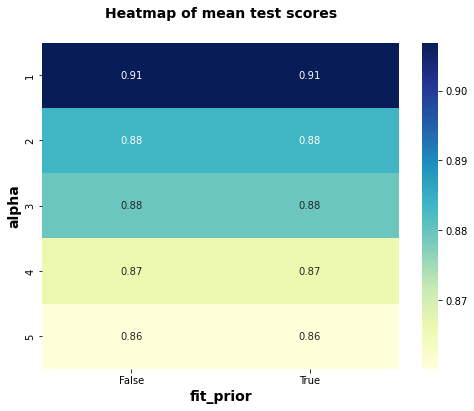

In [118]:
#Iteration 4 Results from grid CV
results = pd.DataFrame(grid.cv_results_)

pivot_table = results.pivot(index='param_alpha', columns='param_fit_prior', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')

plt.title('Heatmap of mean test scores', weight='bold', size=14, pad=25)
plt.xlabel('fit_prior', weight='bold', size=14)
plt.ylabel('alpha', weight='bold', size=14)
plt.show()


In [119]:
#Iteration 4 classification report

best_params = grid.best_params_

best_model = MultinomialNB(alpha=best_params['alpha'], fit_prior=best_params['fit_prior'])

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

    negative       0.91      0.93      0.92        56
    positive       0.91      0.89      0.90        47

    accuracy                           0.91       103
   macro avg       0.91      0.91      0.91       103
weighted avg       0.91      0.91      0.91       103



In [120]:
from sklearn.model_selection import cross_val_score
# Iteration 4 Validation the model on unseen data

scores = cross_val_score(best_model, X, y, cv=5)  # cv=5 means 5-fold cross-validation

print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validated accuracy scores: [0.84466019 0.90291262 0.95145631 0.90291262 0.92156863]
Mean accuracy: 0.9047020750047592


In [121]:
round(0.9047020750047592, 2)

0.9

In [122]:
# Iteration 4 confidence interval

accuracies = [0.84466019, 0.90291262, 0.95145631, 0.90291262, 0.92156863]

mean_acc = np.mean(accuracies)

sem = np.std(accuracies) / np.sqrt(len(accuracies))

me = sem * stats.t.ppf((1 + 0.95) / 2., len(accuracies)-1)

ci = mean_acc - me, mean_acc + me

print(f"The 95% confidence interval is: {ci}")

The 95% confidence interval is: (0.8613971077953813, 0.9480070402046188)


<h1> Logistic Regression <h1>

In [123]:
#Step 1: Select Data
logistic = Naiive.copy()
selected_columns = ['text', 'new_group']
logistic_subset = logistic[selected_columns]

In [124]:
# Step 2: Convert Text Data to Bag-of-Words Representation
from sklearn.feature_extraction.text import CountVectorizer

text_data = logistic_subset['text']

count_vectorizer = CountVectorizer()

X_count = count_vectorizer.fit_transform(text_data)

vocabulary = count_vectorizer.get_feature_names_out()

num_unique_words = len(vocabulary)
print("Number of unique words:", num_unique_words)

Number of unique words: 3198


In [125]:
# Step 3: Check Counts for Each Category
counts = logistic_subset['new_group'].value_counts()
print("Counts for each category:")
print(counts)

Counts for each category:
new_group
negative    257
positive    100
Name: count, dtype: int64


In [126]:
# Step 4: Address Class Imbalance Using RandomOverSampler
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

X = logistic_subset['text']  # Features
y = logistic_subset['new_group']  # Target variable

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)

X_resampled_df = pd.DataFrame({'text': X_resampled.squeeze()})
y_resampled_df = pd.DataFrame({'new_group': y_resampled})

counts = y_resampled_df['new_group'].value_counts()
print("Counts for each category:")
print(counts)

Counts for each category:
new_group
negative    257
positive    257
Name: count, dtype: int64


In [127]:
# Step 5: Vectorize Resampled Text Data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_resampled_vectorized = vectorizer.fit_transform(X_resampled_df['text'])
y_resampled_encoded = y_resampled_df['new_group']

In [128]:
# Step 6: Print Shapes
print(X_resampled_vectorized.shape)
print(y_resampled_encoded.shape)

(514, 3198)
(514,)


In [129]:
## Import necessary libraries
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import classification_report
#from sklearn.model_selection import cross_val_score
#
## Step 7: GridSearchCV hyperparameter tuning, train-test split (80/20), and Logistic Regression fitting
#param_grid = {
#    'C': [0.001, 0.01, 0.1, 1, 10, 100],
#    'penalty': ['l1', 'l2'],
#    'solver': ['liblinear', 'saga'],
#    'max_iter': [100, 500, 1000, 2000]
#}
#
#X_train, X_test, y_train, y_test = train_test_split(X_resampled_vectorized, y_resampled_encoded, test_size=0.2, random_state=42)
#
#clf = GridSearchCV(LogisticRegression(), param_grid, cv=5)
#clf.fit(X_train, y_train)
#
#best_params = clf.best_params_
#
#best_model = LogisticRegression(**best_params)
#best_model.fit(X_train, y_train)
#
## Step 8: Evaluate the model
#y_pred = best_model.predict(X_test)
#label_encoder = LabelEncoder()
#y_test_encoded = label_encoder.fit_transform(y_test)
#y_pred_encoded = label_encoder.transform(y_pred)

# Print classification report
#print("Classification Report:\n", classification_report(y_test_encoded, y_pred_encoded))
#
# Step 10: Cross-validated Accuracy Scores
# Use the original classifier (clf) for cross-validation
#scores = cross_val_score(clf, X_train, y_train, cv=5)

#print("Cross-validated accuracy scores:", scores)
#print("Mean accuracy:", scores.mean())


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Step 7: GridCv hyperparameter tuning, train test 80/20, fit logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000, 2000]
}

X_train, X_test, y_train, y_test = train_test_split(X_resampled_vectorized, y_resampled_encoded, test_size=0.2, random_state=42)

clf = GridSearchCV(LogisticRegression(), param_grid, cv=5)
clf.fit(X_train, y_train)
best_params = clf.best_params_
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)



C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

LogisticRegression(C=1, solver='liblinear')

In [132]:
# Step 9: Encode Labels and Evaluate Classification Report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

label_encoder = LabelEncoder()
y_pred = best_model.predict(X_test)
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

print(classification_report(y_test_encoded, y_pred_encoded))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        56
           1       0.81      0.91      0.86        47

    accuracy                           0.86       103
   macro avg       0.87      0.87      0.86       103
weighted avg       0.87      0.86      0.86       103



In [133]:
# Step 10: Cross-validated Accuracy Scores
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Cross-validated accuracy scores: [0.79518072 0.91463415 0.90243902 0.86585366 0.82926829]
Mean accuracy: 0.8614751689685571


C:\Users\melis\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


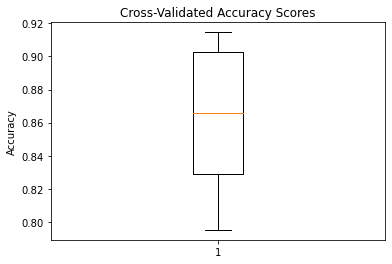

In [134]:
accuracy_scores = [0.79518072, 0.91463415, 0.90243902, 0.86585366, 0.82926829]

# Step 7 visualise scores using box plot

plt.figure(figsize=(6, 4))
plt.boxplot(accuracy_scores)
plt.title('Cross-Validated Accuracy Scores')
plt.ylabel('Accuracy')
plt.show()


In [135]:
# Step 8: STD accuracy
std_accuracy = np.std(accuracy_scores)
print("Standard deviation of accuracy scores:", std_accuracy)


Standard deviation of accuracy scores: 0.044621345914886715


In [136]:
 0.044621345914886715*100

4.462134591488671

Accuracy varies around 4.46% for each fold

In [137]:
import numpy as np
import scipy.stats as stats

accuracies = [0.79518072, 0.914634152, 0.90243902, 0.86585366, 0.82926829]

mean_acc = np.mean(accuracies)

sem = np.std(accuracies) / np.sqrt(len(accuracies))

me = sem * stats.t.ppf((1 + 0.95) / 2., len(accuracies)-1)

ci = mean_acc - me, mean_acc + me

print(f"The 95% confidence interval is: {ci}")


The 95% confidence interval is: (0.8060704490343932, 0.9168798877656067)


In [138]:
# Step 9: 
best_model = clf.best_estimator_

coefficients = best_model.coef_[0]
feature_names = vectorizer.get_feature_names_out()  

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients_df.head(10)) 

       Feature  Coefficient  Abs_Coefficient
1327     great     1.143816         1.143816
1310      good     1.064808         1.064808
413      awful    -0.813036         0.813036
3161     worst    -0.782244         0.782244
1886     never     0.771139         0.771139
1395      help     0.728425         0.728425
3030     valid     0.721730         0.721730
1459  ignorant    -0.710157         0.710157
2392      rude    -0.708976         0.708976
1719      love     0.691395         0.691395


<h1> Comparison of cross validation</h1> <br><sup> Naiive Bayes VS Logistic Regression </sup>

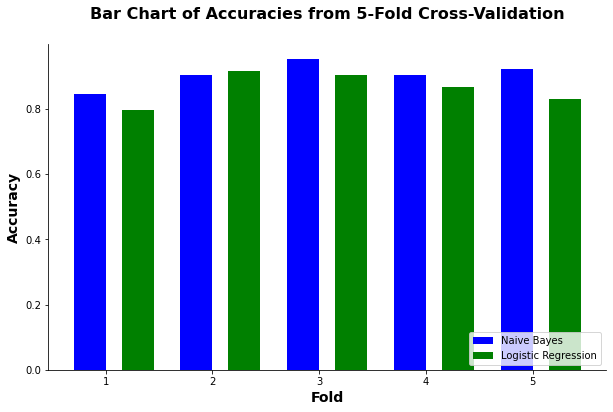

In [139]:
nb_accuracies = [0.84466019, 0.90291262, 0.95145631, 0.90291262, 0.92156863]
lr_accuracies = [0.79518072, 0.91463415, 0.90243902, 0.86585366, 0.82926829]

r1 = np.arange(len(nb_accuracies))
r2 = [x + 0.3 for x in r1]

plt.figure(figsize=(10, 6))

plt.bar(r1, nb_accuracies, width=0.3, color='b', align='center', label='Naive Bayes')
plt.bar(r2, lr_accuracies, width=0.3, color='g', align='edge', label='Logistic Regression')

plt.xlabel('Fold', weight='bold', size=14)
plt.ylabel('Accuracy', weight='bold', size=14)
plt.xticks([r + 0.15 for r in range(len(nb_accuracies))], ['1', '2', '3', '4', '5'])
plt.title('Bar Chart of Accuracies from 5-Fold Cross-Validation', weight='bold', size=16, pad=25)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend(loc='lower right')

plt.show()



<h1> Time Series Forecasting <h1>

In [140]:
combined_df = combined_df.reset_index()

In [141]:
weekly = combined_df[['date_posted']].copy()

In [142]:
weekly

date_posted
0    2024-01-02
1    2024-01-03
2    2023-12-29
3    2023-12-11
4    2023-12-09
..          ...
352  2019-12-01
353  2019-09-30
354  2019-09-24
355  2019-08-28
356  2019-07-17

[357 rows x 1 columns]

In [143]:
weekly['date_posted'] = pd.to_datetime(weekly['date_posted'])

weekly.set_index('date_posted', inplace=True)
weekly_df = weekly.resample('W').size().reset_index(name='frequency')

In [144]:
weekly_df

date_posted  frequency
0    2019-07-21          1
1    2019-07-28          0
2    2019-08-04          0
3    2019-08-11          0
4    2019-08-18          0
..          ...        ...
229  2023-12-10          4
230  2023-12-17          1
231  2023-12-24          2
232  2023-12-31          2
233  2024-01-07          3

[234 rows x 2 columns]

findfont: Font family ['Assistant'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Assistant'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Assistant'] not found. Falling back to DejaVu Sans.


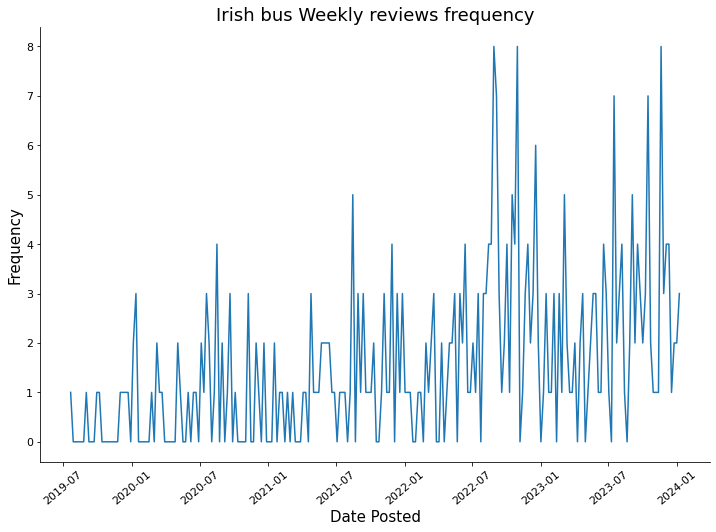

In [145]:
# Visualising weekly frequency of Irish bus company reviews

weekly_df = weekly_df.sort_values('date_posted')

plt.figure(figsize=(12,8))
plt.rc('font', family='Assistant', size=15)

x = weekly_df['date_posted'].values
y = weekly_df['frequency'].values


plt.plot(x, y)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=40)
plt.xlabel('Date Posted')
plt.ylabel('Frequency')
plt.title('Irish bus Weekly reviews frequency')
plt.tick_params(axis='x', labelsize=11)
plt.tick_params(axis='y', labelsize=11)

plt.show()

In [146]:
# Observed volatility- testing stationarity
adfuller(weekly_df["frequency"])

(-1.8064483639462745,
 0.37726499218682935,
 10,
 223,
 {'1%': -3.460018927623594,
  '5%': -2.8745897386146817,
  '10%': -2.57372514086348},
 802.5676251487283)

In [147]:
weekly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_posted  234 non-null    datetime64[ns]
 1   frequency    234 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.8 KB


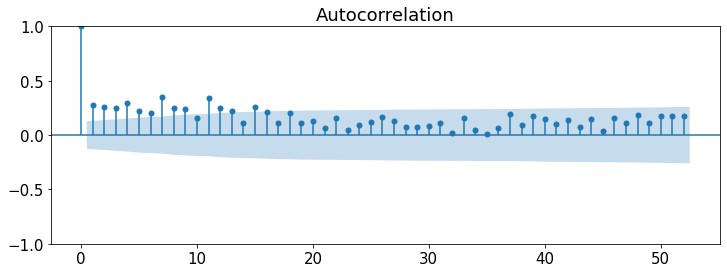

In [148]:
# Co-efficients
fig, ax = plt.subplots(figsize=(12, 4))

plot_acf(weekly_df["frequency"], lags=52, ax=ax);

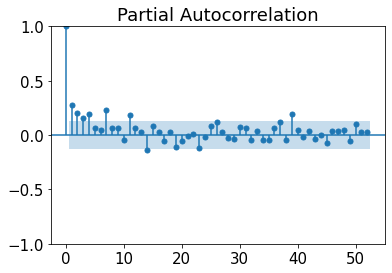

In [149]:
plot_pacf(weekly_df["frequency"], lags=52); # 52 weeks in a year, lag=52

In [150]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

findfont: Font family ['Assistant'] not found. Falling back to DejaVu Sans.


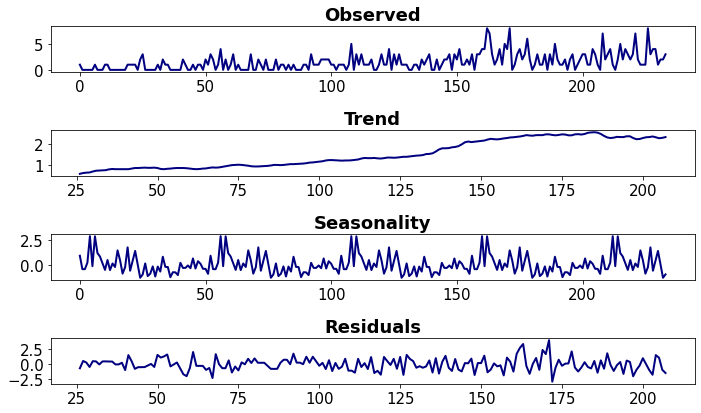

In [151]:
numerical_data = weekly_df['frequency']

decomposition = seasonal_decompose(numerical_data, model='additive', period=52)

(fig, (ax1, ax2, ax3, ax4)) = plt.subplots(4, 1, figsize=(10, 6))

ax1.plot(decomposition.observed, color='navy', linewidth=2)
ax1.set_title('Observed', fontweight='bold')

ax2.plot(decomposition.trend, color='navy', linewidth=2)
ax2.set_title('Trend', fontweight='bold')

ax3.plot(decomposition.seasonal, color='navy', linewidth=2)
ax3.set_title('Seasonality', fontweight='bold')

ax4.plot(decomposition.resid, color='navy', linewidth=2)
ax4.set_title('Residuals', fontweight='bold')

plt.tight_layout()
plt.show()

In [152]:
# 1st forecast model is holt winters exponentiol smoothing model
# Observed seasonality, growing trend and noise

from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [153]:
weekly_df['frequency'].dtype

dtype('int64')

In [154]:
weekly_df.tail()

date_posted  frequency
229  2023-12-10          4
230  2023-12-17          1
231  2023-12-24          2
232  2023-12-31          2
233  2024-01-07          3

In [155]:
# additive component as the seasonality is constant
modelh = HWES(weekly_df['frequency'], seasonal_periods=52, trend='add', seasonal='add')
fitted = modelh.fit()

In [156]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                frequency   No. Observations:                  234
Model:             ExponentialSmoothing   SSE                            361.878
Optimized:                         True   AIC                            214.021
Trend:                         Additive   BIC                            407.519
Seasonal:                      Additive   AICC                           253.129
Seasonal Periods:                    52   Date:                 Tue, 23 Jan 2024
Box-Cox:                          False   Time:                         23:53:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              1.4901e-08                alpha                 True
smoothing_trend          

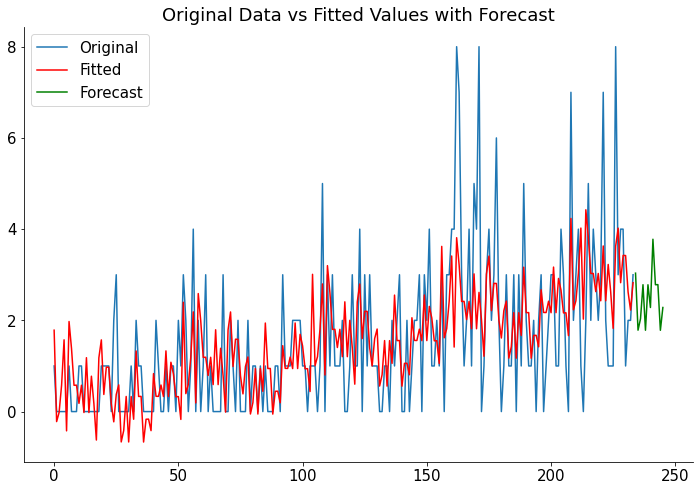

In [157]:
forecast = fitted.forecast(steps=12)

plt.figure(figsize=(12,8))
plt.plot(weekly_df['frequency'], label='Original')

fitted_values = fitted.fittedvalues
plt.plot(fitted_values, color='red', label='Fitted')

plt.plot(forecast, color='green', label='Forecast')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Original Data vs Fitted Values with Forecast')
plt.legend()
plt.show()


In [158]:
print(forecast)

234    3.034671
235    1.784416
236    2.033714
237    2.781385
238    1.783282
239    2.780273
240    2.281801
241    3.778520
242    2.781280
243    2.782999
244    1.782135
245    2.281821
dtype: float64


In [159]:
resid_std = np.std(fitted.resid)

# Calculate the confidence intervals
lower_bound = forecast - 1.96 * resid_std
upper_bound = forecast + 1.96 * resid_std

# Print the confidence intervals
print(lower_bound, upper_bound)

234    0.597259
235   -0.652997
236   -0.403698
237    0.343972
238   -0.654131
239    0.342861
240   -0.155612
241    1.341107
242    0.343867
243    0.345586
244   -0.655277
245   -0.155592
dtype: float64 234    5.472084
235    4.221828
236    4.471127
237    5.218797
238    4.220694
239    5.217686
240    4.719214
241    6.215933
242    5.218693
243    5.220412
244    4.219548
245    4.719233
dtype: float64


<h1> SARIMA <H1>

In [160]:
# For later validation
df_train = weekly_df.iloc[:-12].copy()    # Remove last 12 rows
df_test = weekly_df.iloc[-12:].copy()     # Consider only last 12 rows

# Display the size of the dataframes
df_train.shape, df_test.shape

((222, 2), (12, 2))

In [161]:
#Grid search for Arima model as the seasonal parameter is pre-determined at 52, trade off on accuracy vs computational time for the grid search

aicList = []

for p in range(0, 5):
    for d in range(0, 5):
        for q in range(0,5):
            print(p, d, q)
            aicList.append([sm.ARIMA((weekly_df["frequency"]), order =(p, d, q)).fit().aic, p, d, q])

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 2 0
0 2 1
0 2 2


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 2 3
0 2 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 3 0
0 3 1
0 3 2


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 3 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 3 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 4 0
0 4 1
0 4 2
0 4 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 4 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1 0 0
1 0 1
1 0 2
1 0 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1 0 4
1 1 0
1 1 1
1 1 2
1 1 3
1 1 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 2 0
1 2 1
1 2 2


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 2 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 2 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 3 0
1 3 1
1 3 2
1 3 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 3 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 4 0
1 4 1
1 4 2
1 4 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 4 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 0 0
2 0 1
2 0 2
2 0 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2 0 4
2 1 0
2 1 1
2 1 2
2 1 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 1 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 2 0
2 2 1
2 2 2
2 2 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 2 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 3 0
2 3 1
2 3 2


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 3 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 3 4
2 4 0
2 4 1
2 4 2


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 4 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2 4 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 0 0
3 0 1
3 0 2
3 0 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 0 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 1 0
3 1 1
3 1 2
3 1 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 1 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 2 0
3 2 1
3 2 2
3 2 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 2 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 3 0
3 3 1
3 3 2


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 3 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 3 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 4 0
3 4 1
3 4 2


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 4 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 4 4
4 0 0
4 0 1
4 0 2


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 0 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 0 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 1 0
4 1 1
4 1 2
4 1 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 1 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 2 0
4 2 1
4 2 2


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 2 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 2 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 3 0
4 3 1
4 3 2


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 3 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 3 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 4 0
4 4 1
4 4 2


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 4 3


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 4 4


C:\Users\melis\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [162]:
aicList.sort()

In [163]:
aicList

[[12.0, 2, 4, 3],
 [72.9339898019654, 4, 3, 2],
 [842.9626510299888, 0, 1, 1],
 [844.0926483289453, 4, 1, 3],
 [844.9521533279335, 0, 1, 2],
 [844.9526250483501, 1, 1, 1],
 [845.6370940084532, 2, 1, 4],
 [845.6783387029841, 3, 1, 3],
 [846.6924641350046, 2, 1, 3],
 [846.8590732721394, 0, 1, 3],
 [846.8613546894478, 2, 1, 1],
 [846.9444612820912, 1, 1, 2],
 [847.6043395269244, 3, 1, 4],
 [848.2054308175648, 0, 1, 4],
 [848.4632535592491, 3, 1, 1],
 [848.790782385827, 1, 0, 1],
 [848.9433429917683, 1, 1, 3],
 [848.9436857684391, 2, 1, 2],
 [849.8957436635459, 1, 1, 4],
 [849.9199534385054, 4, 1, 4],
 [850.2100098602914, 4, 1, 1],
 [850.2412916478223, 3, 1, 2],
 [850.6428271371722, 4, 2, 4],
 [850.7342170934428, 1, 0, 2],
 [850.7380434313413, 2, 0, 1],
 [850.9251365947537, 0, 2, 2],
 [851.0578467363406, 4, 0, 4],
 [851.3725951010608, 3, 0, 4],
 [851.7660912986107, 3, 0, 3],
 [852.0641674047397, 4, 1, 2],
 [852.515669171466, 1, 0, 3],
 [852.542693152192, 3, 0, 1],
 [852.748126109651, 2, 0,

In [164]:
# Although 2,4,3 were the best params, to decrease complexity, 0,1,1 was selected with seasonal at 52

from statsmodels.tsa.arima.model import ARIMA

model2 = SARIMAX(weekly_df['frequency'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 52)).fit()

C:\Users\melis\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [165]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          frequency   No. Observations:                  234
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                -360.856
Date:                            Tue, 23 Jan 2024   AIC                            727.712
Time:                                    23:53:53   BIC                            737.308
Sample:                                         0   HQIC                           731.602
                                            - 234                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9466      0.019    -50.215      0.000      -0.984      -0.910
ma.S.L52      -0.7569      0.155     -4.871      0.000      -1.061      -0.452
sigma2         2.5040      0.296      8.472      0.000       1.925       3.083
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                34.30
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [166]:
pred_time = 12
result = model2.forecast(pred_time) #forecast
ci = model2.get_forecast(pred_time).conf_int() # stats about forecast

In [167]:
result

234    2.898594
235    1.571188
236    1.794963
237    2.674818
238    1.517426
239    2.624948
240    2.086076
241    3.712377
242    2.604855
243    2.551093
244    1.571188
245    2.106169
Name: predicted_mean, dtype: float64

In [168]:
ci

lower frequency  upper frequency
234        -0.282342         6.079530
235        -1.614279         4.756654
236        -1.395027         4.984954
237        -0.519691         5.869326
238        -1.681594         4.716446
239        -0.578576         5.828473
240        -1.121948         5.294099
241         0.499862         6.924893
242        -0.612147         5.821857
243        -0.670389         5.772575
244        -1.654768         4.797143
245        -1.124254         5.336591

findfont: Font family ['Assistant'] not found. Falling back to DejaVu Sans.


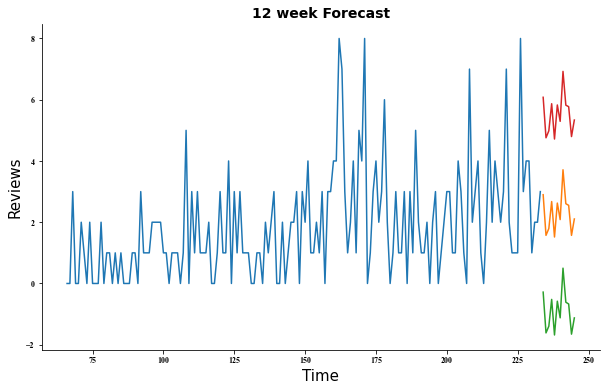

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_df["frequency"].iloc[-168:])
plt.plot(result)
plt.plot(ci)
plt.title('12 week Forecast', fontsize=14, weight="bold")
plt.xlabel('Time')
plt.ylabel('Reviews')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontname='Times New Roman', fontsize=8, weight="bold")
plt.yticks(fontname='Times New Roman', fontsize=8, weight="bold")
plt.show()

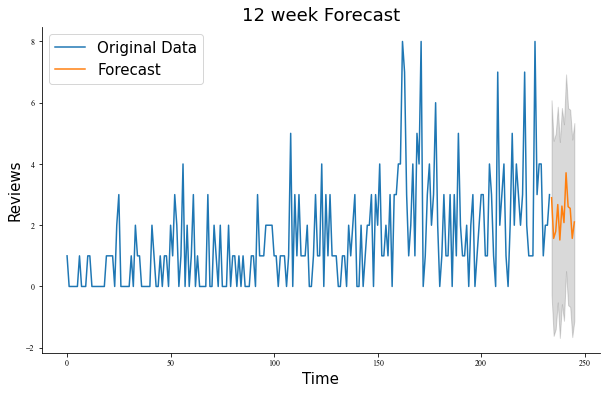

In [170]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_df["frequency"], label='Original Data')

plt.plot(result, label='Forecast')

plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='k', alpha=.15)

plt.title('12 week Forecast')
plt.xlabel('Time')
plt.ylabel('Reviews')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontname='Times New Roman', fontsize=8)
plt.yticks(fontname='Times New Roman', fontsize=8)

plt.legend()

plt.show()


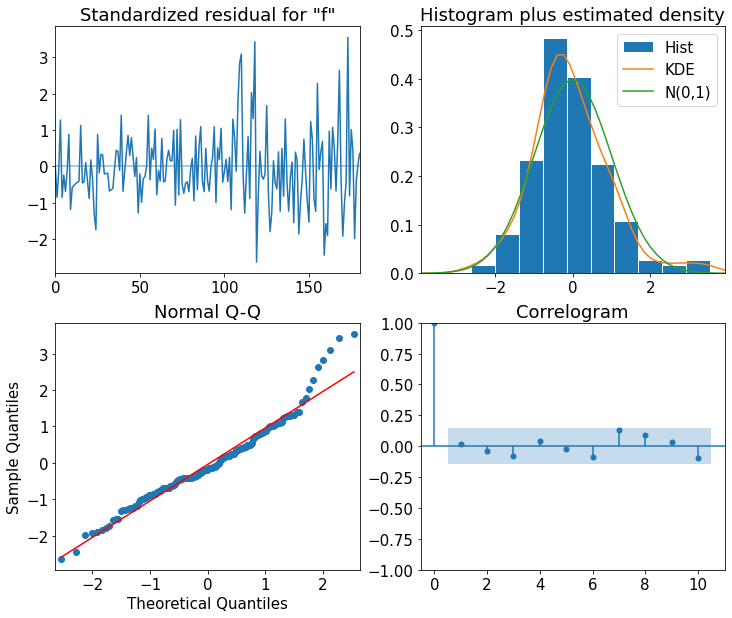

In [171]:
model2.plot_diagnostics(figsize=(12, 10));

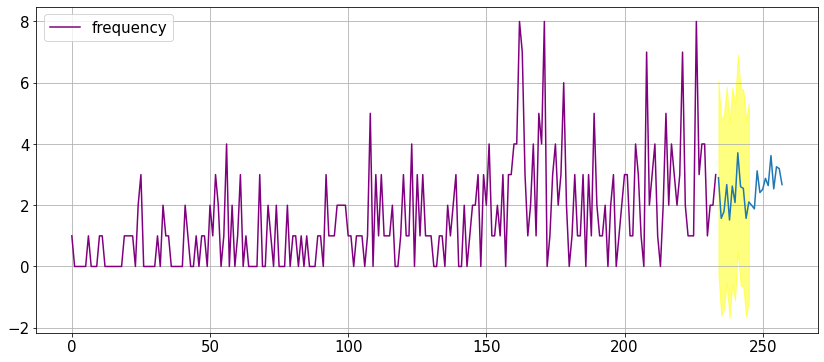

In [172]:
forecast_values = model2.get_forecast(steps= 24)
forecast_ci = model2.get_forecast(pred_time).conf_int()

ax = weekly_df.plot(y = "frequency", legend=True, color="purple", figsize=(14, 6))

forecast_values.predicted_mean.plot(ax = ax, label="Forecast", grid=True)

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1],
                color="yellow", alpha=0.5
               )
plt.show()

In [173]:
weekly_df.tail()

date_posted  frequency
229  2023-12-10          4
230  2023-12-17          1
231  2023-12-24          2
232  2023-12-31          2
233  2024-01-07          3

In [174]:
last_timestamp = pd.to_datetime('2024-01-07')
forecast_index = pd.date_range(start=last_timestamp, periods=pred_time+1, freq='W')[1:]

forecast_values = pd.Series(result.values, index=forecast_index)

In [175]:
forecast_values = pd.Series(result.values, index=forecast_index)

In [176]:
forecast_values.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 12 entries, 2024-01-14 to 2024-03-31
Freq: W-SUN
Series name: None
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [177]:
forecast_values.head(24)

2024-01-14    2.898594
2024-01-21    1.571188
2024-01-28    1.794963
2024-02-04    2.674818
2024-02-11    1.517426
2024-02-18    2.624948
2024-02-25    2.086076
2024-03-03    3.712377
2024-03-10    2.604855
2024-03-17    2.551093
2024-03-24    1.571188
2024-03-31    2.106169
Freq: W-SUN, dtype: float64

<h1> Comparison of Holt-Winters forecast against Sarima <h1>

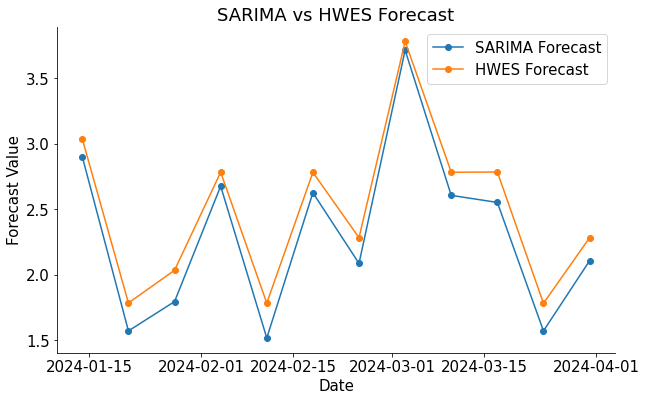

In [178]:
# SARIMA data
sarima_dates = pd.date_range(start="2024-01-14", end="2024-03-31", freq="W-SUN")
sarima_forecast = [2.898594, 1.571188, 1.794963, 2.674818, 1.517426, 2.624948, 2.086076, 3.712377, 2.604855, 2.551093, 1.571188, 2.106169]

sarima_series = pd.Series(sarima_forecast, index=sarima_dates)

# HWES data
hwes_dates = pd.date_range(start="2024-01-14", end="2024-03-31", freq="W-SUN")
hwes_forecast = [3.034671, 1.784416, 2.033714, 2.781385, 1.783282, 2.780273, 2.281801, 3.778520, 2.781280, 2.782999, 1.782135, 2.281821]

hwes_series = pd.Series(hwes_forecast, index=hwes_dates)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sarima_series, label='SARIMA Forecast', marker='o')
plt.plot(hwes_series, label='HWES Forecast', marker='o')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('SARIMA vs HWES Forecast')
plt.xlabel('Date')
plt.ylabel('Forecast Value')
plt.legend()
plt.show()

The plotted line chart of forecasted values for both models appears to illustrate similar forecast values. A paired t-test will be used to test the null hypothesis that the means are equal.

In [179]:
sarima_forecast = np.array([2.898594, 1.571188, 1.794963, 2.674818, 1.517426, 2.624948, 2.086076, 3.712377, 2.604855, 2.551093, 1.571188, 2.106169])
hwes_forecast = np.array([3.034671, 1.784416, 2.033714, 2.781385, 1.783282, 2.780273, 2.281801, 3.778520, 2.781280, 2.782999, 1.782135, 2.281821])

from scipy.stats import ttest_rel

# Perform a paired t-test
t_stat, p_value = ttest_rel(sarima_forecast, hwes_forecast)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -10.852367514875061
p-value: 3.2457037440778446e-07


In this case the null hypothesis is accepted as the t-statistic represents the measure of difference with the p value being above the significance threshold meaning the diffrence is not statistically significant and the forecasted values are in fact similar.

In [180]:
sarima_ci_upper = np.array([6.079530, 4.756654, 4.984954, 5.869326, 4.716446, 5.828473, 5.294099, 6.924893, 5.821857, 5.772575, 4.797143, 5.336591])
sarima_forecast = np.array([2.898594, 1.571188, 1.794963, 2.674818, 1.517426, 2.624948, 2.086076, 3.712377, 2.604855, 2.551093, 1.571188, 2.106169])

hwes_ci_upper = np.array([5.472084, 4.221828, 4.471127, 5.218797, 4.220694, 5.217686, 4.719214, 6.215933, 5.218693, 5.220412, 4.219548, 4.719233])
hwes_forecast = np.array([3.034671, 1.784416, 2.033714, 2.781385, 1.783282, 2.780273, 2.281801, 3.778520, 2.781280, 2.782999, 1.782135, 2.281821])

sarima_mape = np.mean(np.abs((sarima_ci_upper - sarima_forecast) / sarima_forecast)) * 100

hwes_mape = np.mean(np.abs((hwes_ci_upper - hwes_forecast) / hwes_forecast)) * 100

print(f"SARIMA MAPE: {sarima_mape:.2f}%")
print(f"HWES MAPE: {hwes_mape:.2f}%")

SARIMA MAPE: 149.27%
HWES MAPE: 103.24%


Although neither model has a very good Mean Absolute Percentage Error, HWES has a better MAPE and is in terms of the comparison, the better model.

<h1> Validation <h1>

In [181]:
df_test.shape

(12, 2)

In [182]:
df_train.shape

(222, 2)

In [183]:
train3 = df_train
test3 = df_test

In [184]:
start = len(train3)
end = len(train3) + len(test3) - 1

tmodel3 = model2.predict(start=start, end=end).rename("SARIMA PREDICTIONS")

tmodel3 = pd.Series(tmodel3[-len(test3):], index=test3.index)


In [185]:
date_range = pd.date_range(start=test3['date_posted'].min(), periods=len(tmodel3), freq='W')

tmodel3 = pd.Series(tmodel3.values, index=date_range)


In [186]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

In [187]:
test3

date_posted  frequency
222  2023-10-22          2
223  2023-10-29          1
224  2023-11-05          1
225  2023-11-12          1
226  2023-11-19          8
227  2023-11-26          3
228  2023-12-03          4
229  2023-12-10          4
230  2023-12-17          1
231  2023-12-24          2
232  2023-12-31          2
233  2024-01-07          3

In [188]:
test3_numeric = pd.to_numeric(test3['frequency'], errors='coerce')

mae = mean_absolute_error(test3_numeric, tmodel3)
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 1.66


In [189]:

test3_column = test3['frequency']

data_range = test3_column.max() - test3_column.min()
print(f"Range of test data: {data_range:.2f}")

data_std = test3_column.std()
print(f"Standard deviation of test data: {data_std:.2f}")

print(f"Mean Absolute Error: {mae:.2f}")


Range of test data: 7.00
Standard deviation of test data: 2.02
Mean Absolute Error: 1.66


In [190]:
mean_squared_error(tmodel3, test3_numeric)

5.177221846835093

In [191]:
r2_score(tmodel3, test3_numeric)

-5.930718677189417

<h1> DashBoard <h1>

In [192]:
# SARIMA data
sarima_dates = pd.date_range(start="2024-01-14", end="2024-03-31", freq="W-SUN")
sarima_forecast = [2.898594, 1.571188, 1.794963, 2.674818, 1.517426, 2.624948, 2.086076, 3.712377, 2.604855, 2.551093, 1.571188, 2.106169]

sarima_series = pd.Series(sarima_forecast, index=sarima_dates)

# HWES data
hwes_dates = pd.date_range(start="2024-01-14", end="2024-03-31", freq="W-SUN")
hwes_forecast = [3.034671, 1.784416, 2.033714, 2.781385, 1.783282, 2.780273, 2.281801, 3.778520, 2.781280, 2.782999, 1.782135, 2.281821]

hwes_series = pd.Series(hwes_forecast, index=hwes_dates)

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=sarima_dates, y=sarima_forecast, mode='lines+markers', name='SARIMA Forecast'))

fig.add_trace(go.Scatter(x=hwes_dates, y=hwes_forecast, mode='lines+markers', name='HWES Forecast'))

fig.update_layout(
    title='SARIMA vs HWES Forecast Weekly Jan 14th - March 24th',
    xaxis=dict(
        title='Date',
        showgrid=True,
        zeroline=True,
        gridcolor='black',
        zerolinecolor='black',
        linecolor='black',
        mirror=False
    ),
    yaxis=dict(
        title='Forecast Value',
        showgrid=True,
        zeroline=True,
        gridcolor='black',
        zerolinecolor='black',
        linecolor='black',
        mirror=False
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    autosize=False,
    width=1000,
    height=600
)


fig.show()


In [193]:
import plotly.graph_objects as go


trace1 = go.Bar(
    x=sentiments,
    y=pre_counts,
    name='Pre 2022',
    marker=dict(color='darkgreen')
)

trace2 = go.Bar(
    x=sentiments,
    y=post_counts,
    name='Post 2022',
    marker=dict(color='orange')
)

layout = go.Layout(
    title=dict(text='Sentiment Distribution Pre and Post 2022 (Ireland)', font=dict(size=14, color='black')),
    xaxis=dict(
        title=dict(text='', font=dict(size=14, color='black')),
        gridcolor='black',  
        showgrid=True,  
        zerolinecolor='black'  
    ),
    yaxis=dict(
        title=dict(text='Count', font=dict(size=14, color='black')),
        gridcolor='black',  
        showgrid=True,  
        zerolinecolor='black'  
    ),
    plot_bgcolor='white',  
    barmode='group',  
    autosize=False,
    width=800,
    height=600
)

fig = go.Figure(data=[trace1, trace2], layout=layout)


fig.show()


In [194]:
%matplotlib inline
from jupyter_dash import JupyterDash
import plotly.graph_objs as go
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc


# SARIMA data
sarima_dates = pd.date_range(start="2024-01-14", end="2024-03-31", freq="W-SUN")
sarima_forecast = [2.898594, 1.571188, 1.794963, 2.674818, 1.517426, 2.624948, 2.086076, 3.712377, 2.604855, 2.551093, 1.571188, 2.106169]
sarima_series = pd.Series(sarima_forecast, index=sarima_dates)

# HWES data
hwes_dates = pd.date_range(start="2024-01-14", end="2024-03-31", freq="W-SUN")
hwes_forecast = [3.034671, 1.784416, 2.033714, 2.781385, 1.783282, 2.780273, 2.281801, 3.778520, 2.781280, 2.782999, 1.782135, 2.281821]
hwes_series = pd.Series(hwes_forecast, index=hwes_dates)

# Bar Chart data
sentiments = ['Negative', 'Positive', 'Neutral']
pre_counts = [92, 51, 7]  
post_counts = [142, 49, 16]  



# Initialize the Dash app
app = JupyterDash(__name__, external_stylesheets=[dbc.themes.MORPH])



# Layout of the dashboard
app.layout = dbc.Container(
    [
        dbc.Row(
            dbc.Col(html.H1("Irish Bus Reviews Dashboard", style={'marginBottom': '20px'}), width={'size': 6, 'offset': 3}),
            style={'marginBottom': '20px'}
        ),

        dbc.Row(
            dbc.Col(html.Button("12 Week Forecast", id="sarima-button", n_clicks=0, style={'width': '100%'}), width={'size': 6, 'offset': 3}),
            style={'marginBottom': '20px'}
        ),

        dbc.Row(
            dbc.Col(
                dcc.Graph(
                    id='sarima-chart',
                    figure={
                        'data': [
                            {'x': sarima_dates, 'y': sarima_forecast, 'type': 'lines+markers', 'name': 'SARIMA Forecast'},
                        ],
                        'layout': {
                            'title': 'SARIMA Forecast Weekly Jan 14th - March 24th',
                            'xaxis': {'title': 'Date'},
                            'yaxis': {'title': 'Forecast Value'},
                            'plot_bgcolor': 'white',
                            'paper_bgcolor': 'white',
                            'autosize': False,
                            'width': 1000,
                            'height': 600,
                            'showlegend': True,
                            'visible': False,  
                            'margin': {'l': 40, 'r': 40, 't': 40, 'b': 40},  
                        }
                    }
                ),
                width={'size': 6, 'offset': 3}
            ),
            style={'marginBottom': '20px'}
        ),

        dbc.Row(
            dbc.Col(html.Button("Review Sentiment Overtime", id="bar-chart-button", n_clicks=0, style={'width': '100%'}), width={'size': 6, 'offset': 3}),
            style={'marginBottom': '20px'}
        ),

        dbc.Row(
            dbc.Col(
                dcc.Graph(
                    id='bar-chart',
                    figure={
                        'data': [
                            {'x': sentiments, 'y': pre_counts, 'type': 'bar', 'name': 'Pre 2022', 'marker': {'color': 'lightskyblue'}},
                            {'x': sentiments, 'y': post_counts, 'type': 'bar', 'name': 'Post 2022', 'marker': {'color': 'lightsteelblue'}},
                        ],
                        'layout': {
                            'title': 'Sentiment Distribution Pre and Post 2022 (Ireland)',
                            'xaxis': {'title': ''},
                            'yaxis': {'title': 'Count'},
                            'plot_bgcolor': 'white',
                            'autosize': False,
                            'width': 800,
                            'height': 600,
                            'showlegend': True,
                            'visible': True,  
                            'margin': {'l': 40, 'r': 40, 't': 40, 'b': 40},  
                        }
                    }
                ),
                width={'size': 6, 'offset': 3}
            ),
            style={'marginBottom': '20px'}
        ),
    ],
    fluid=True,
)

@app.callback(
    Output('sarima-chart', 'figure'),
    [Input('sarima-button', 'n_clicks')]
)
def update_sarima_chart(n_clicks):
    if n_clicks % 2 == 1:
        return {
            'data': [
                {'x': sarima_dates, 'y': sarima_forecast, 'type': 'lines+markers', 'name': 'SARIMA Forecast'},
            ],
            'layout': {
                'title': 'Bus Review Forecast, Jan 14th - March 24th',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Forecast Value'},
                'plot_bgcolor': 'white',
                'paper_bgcolor': 'white',
                'autosize': False,
                'width': 1000,
                'height': 600,
                'showlegend': True,
                'visible': True,  # Show the chart
                'margin': {'l': 40, 'r': 40, 't': 40, 'b': 40},  
            }
        }
    else:
        return {
            'data': [],
            'layout': {
                'title': 'Click To View',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Forecast Value'},
                'plot_bgcolor': 'white',
                'paper_bgcolor': 'white',
                'autosize': False,
                'width': 1000,
                'height': 600,
                'showlegend': False,
                'visible': False,  
                'margin': {'l': 40, 'r': 40, 't': 40, 'b': 40},  
            }
        }

@app.callback(
    Output('bar-chart', 'figure'),
    [Input('bar-chart-button', 'n_clicks')]
)
def update_bar_chart(n_clicks):
    if n_clicks % 2 == 1:
        return {
            'data': [
                {'x': sentiments, 'y': pre_counts, 'type': 'bar', 'name': 'Pre 2022', 'marker': {'color': 'lightskyblue'}},
                {'x': sentiments, 'y': post_counts, 'type': 'bar', 'name': 'Post 2022', 'marker': {'color': 'lightsteelblue'}},
            ],
            'layout': {
                'title': 'Sentiment Distribution Pre and Post 2022 (Ireland)',
                'xaxis': {'title': ''},
                'yaxis': {'title': 'Count'},
                'plot_bgcolor': 'white',
                'autosize': False,
                'width': 1000,
                'height': 600,
                'showlegend': True,
                'visible': False,  
                'margin': {'l': 40, 'r': 40, 't': 40, 'b': 40},  
            }
        }
    else:
        return {
            'data': [],
            'layout': {
                'title': 'Click To View',
                'xaxis': {'title': ''},
                'yaxis': {'title': ''},
                'plot_bgcolor': 'white',
                'paper_bgcolor': 'white',
                'autosize': False,
                'width': 1000,
                'height': 600,
                'showlegend': False,
                'visible': False,  
                'margin': {'l': 40, 'r': 40, 't': 40, 'b': 40},  
            }
        }

if __name__ == '__main__':
    app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/


<h1> Parsing JSON <h1>

By default there is a limit on how much data can come in to the notebook and unless this is specified to be increased there will be an error 'IOPub data rate exceeded error' which I encountered- below are two ways you can change this, one is in a code cell you can execute from the notebook and the other is in markdown you can execute in your terminal window.

In [195]:
#!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 #to increase limit from cell to increase data rate limit

In [196]:
#pip install pyjstat

In [197]:
import urllib.request, json
import pandas as pd

try:
    url = "https://api.nationaltransport.ie/gtfsr/v2/gtfsr?format=json"

    hdr = {
        # Request headers
        'Cache-Control': 'no-cache',
        'x-api-key': '775242be9f004c1fa4c9da5a610bc9db', #personalkey
    }

    req = urllib.request.Request(url, headers=hdr)

    req.get_method = lambda: 'GET'
    response = urllib.request.urlopen(req)

    if response.getcode() == 200:
        # Read and decode the JSON data
        data = json.loads(response.read().decode('utf-8'))
        # Now 'data' contains the JSON response from the API

        # Convert the 'entity' list of dictionaries to a DataFrame
        df = pd.json_normalize(data['entity'])
        print(df)
    else:
        print("Request failed with status code:", response.getcode())
except Exception as e:
    print(e)


       id trip_update.trip.trip_id trip_update.trip.start_time  \
0      T1              3789_204753                    18:05:00   
1      T2              3789_149952                    19:45:00   
2      T3              3789_113154                    20:00:00   
3      T4                      NaN                    20:45:00   
4      T5                      NaN                    20:45:00   
..    ...                      ...                         ...   
789  T790               3789_17438                    25:30:00   
790  T791              3789_105567                    25:30:00   
791  T792              3789_102191                    25:30:00   
792  T793               3789_18628                    25:39:00   
793  T794              3789_149995                    25:45:00   

    trip_update.trip.start_date trip_update.trip.schedule_relationship  \
0                      20240123                              SCHEDULED   
1                      20240123                            

In [198]:
df.head()

id trip_update.trip.trip_id trip_update.trip.start_time  \
0  T1              3789_204753                    18:05:00   
1  T2              3789_149952                    19:45:00   
2  T3              3789_113154                    20:00:00   
3  T4                      NaN                    20:45:00   
4  T5                      NaN                    20:45:00   

  trip_update.trip.start_date trip_update.trip.schedule_relationship  \
0                    20240123                              SCHEDULED   
1                    20240123                              SCHEDULED   
2                    20240123                              SCHEDULED   
3                    20240123                                  ADDED   
4                    20240123                                  ADDED   

  trip_update.trip.route_id  trip_update.trip.direction_id  \
0                3789_59138                              1   
1                3789_59136                              1   
2                3789_59134                              0   
3                3789_59222                              1   
4                3789_59153                              0   

                        trip_update.stop_time_update trip_update.timestamp  \
0  [{'stop_sequence': 25, 'arrival': {'delay': 70...            1706054033   
1  [{'stop_sequence': 15, 'arrival': {'delay': 50...            1706054033   
2  [{'stop_sequence': 16, 'arrival': {'delay': 87...            1706054033   
3  [{'stop_sequence': 16, 'arrival': {'time': '17...            1706054033   
4  [{'stop_sequence': 28, 'arrival': {'time': '17...            1706054033   

  trip_update.vehicle.id  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

In [199]:
first_data_point = df['trip_update.stop_time_update'].iloc[0]
print(first_data_point)


[{'stop_sequence': 25, 'arrival': {'delay': 7035}, 'stop_id': '8370B2550201', 'schedule_relationship': 'SCHEDULED'}]


In [200]:
# Expand the dictionaries in each row into separate columns and create a new DataFrame
expanded_df = pd.json_normalize(df['trip_update.stop_time_update'].explode()).reset_index(drop=True)


In [201]:
expanded_df.head(10)

stop_sequence       stop_id schedule_relationship  arrival.delay  \
0           25.0  8370B2550201             SCHEDULED         7035.0   
1           15.0   8240B111911             SCHEDULED           50.0   
2           16.0   8220B135001             SCHEDULED          -10.0   
3           16.0  8500B5557901             SCHEDULED          872.0   
4           17.0  8510B5550801             SCHEDULED          706.0   
5           18.0  8510B5248601             SCHEDULED          776.0   
6           16.0  8400B0635011                   NaN            NaN   
7           28.0  8310B1013801                   NaN            NaN   
8           29.0  8310B1013901                   NaN            NaN   
9           30.0  8310B1324101                   NaN            NaN   

   departure.delay arrival.time departure.time  arrival.uncertainty  
0              NaN          NaN            NaN                  NaN  
1              NaN          NaN            NaN                  NaN  
2              NaN          NaN            NaN                  NaN  
3            872.0          NaN            NaN                  NaN  
4              NaN          NaN            NaN                  NaN  
5              NaN          NaN            NaN                  NaN  
6              NaN   1706047080            NaN                  NaN  
7              NaN   1706047050     1706047050                  NaN  
8              NaN   1706047230     1706047230                  NaN  
9              NaN   1706047290     1706047290                  NaN